In [1]:
import pandas as pd
import numpy as np
import ast

In [2]:
# rm -r '/data/home/ubuntu/BO_tagging/field notebooks/life_sci'

In [3]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [4]:
from sklearn.utils import class_weight
import numpy as np
from keras.callbacks import EarlyStopping
import h5py


In [5]:
from keras.models import Sequential, Model, load_model
from keras import applications
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras import Model, layers
from keras.models import load_model, model_from_json
img_rows, img_cols, img_channel = 224, 224, 3
import  keras
from keras.layers import (Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D,
                          BatchNormalization, Input, Conv2D, GlobalAveragePooling2D)
from keras.applications.resnet50 import ResNet50
from keras.callbacks import ModelCheckpoint
from keras import metrics
from keras.optimizers import Adam 
from keras import backend as K
import keras
from keras.models import Model
import keras
# from keras.models import Model
from keras.layers import Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
# set the matplotlib backend so figures can be saved in the background
import matplotlib
matplotlib.use("Agg")

# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
# import cv2

In [6]:
import keras
print(keras.__version__)

2.2.4


In [7]:
TRAIN_DIR = '/data/home/ubuntu/BO_tagging/field notebooks/life_sci/'

In [8]:
train_images_dogs_cats = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)]

In [9]:
len(train_images_dogs_cats)

8171

In [10]:
key =  ['Anatomy',
 'Biology in Human Welfare',
 'Cell Biology',
 'Diversity in Living World',
 'Genetics & Evolution',
 'Life Processes',
 'Morphology']

In [11]:
dict1={}
for i, value in enumerate(key):
    dict1[value] = i

In [12]:
len(dict1)

7

In [13]:
dict1

{'Anatomy': 0,
 'Biology in Human Welfare': 1,
 'Cell Biology': 2,
 'Diversity in Living World': 3,
 'Genetics & Evolution': 4,
 'Life Processes': 5,
 'Morphology': 6}

In [14]:
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import re
import cv2

In [15]:
def prepare_data(list_of_images):
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """
    x = [] # images as arrays
    y=[]
    
    for image in tqdm(list_of_images):
        try:
            x.append(cv2.resize(cv2.imread(image), (224,224), interpolation=cv2.INTER_CUBIC))
            z= image.split('/')[-1].split('.')[0].split('_')[0]
            #z=(re.split('\d+',image)[0][-11:])
            print(z)
            y.append(dict1[z])

        except:
            
            continue
    
    return x,y

In [16]:
train_images_dogs_cats[0]


'/data/home/ubuntu/BO_tagging/field notebooks/life_sci/Cell Biology_3230.jpg'

In [17]:
X ,Y= prepare_data(train_images_dogs_cats)
#print(K.image_data_format())

  0%|          | 2/8171 [00:00<09:43, 14.00it/s]

Cell Biology
Life Processes
Diversity in Living World
Cell Biology
Genetics & Evolution
Morphology
Life Processes
Cell Biology
Biology in Human Welfare
Genetics & Evolution
Morphology
Morphology
Cell Biology
Cell Biology


  1%|          | 45/8171 [00:00<05:03, 26.74it/s]

Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Anatomy
Life Processes
Morphology
Cell Biology
Life Processes
Genetics & Evolution
Anatomy
Cell Biology
Biology in Human Welfare
Genetics & Evolution
Morphology
Diversity in Living World
Life Processes
Anatomy
Biology in Human Welfare
Cell Biology
Biology in Human Welfare
Diversity in Living World
Cell Biology
Diversity in Living World
Anatomy
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Genetics & Evolution
Morphology
Morphology


  1%|          | 79/8171 [00:00<03:04, 43.80it/s]

Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Morphology
Cell Biology
Biology in Human Welfare
Life Processes
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Morphology
Genetics & Evolution
Anatomy
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Biology in Human Welfare
Anatomy
Life Processes
Biology in Human Welfare
Anatomy
Life Processes
Diversity in Living World
Morphology
Diversity in Living World
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Life Processes
Biology in Human Welfare
Life Processes
Genetics & Evolution
Biology in Human Welfare
Life Processes
Cell Biology
Diversity in Living World


  1%|          | 93/8171 [00:00<02:33, 52.63it/s]

Diversity in Living World
Morphology
Biology in Human Welfare
Diversity in Living World
Life Processes
Genetics & Evolution
Diversity in Living World
Life Processes
Morphology
Biology in Human Welfare
Biology in Human Welfare
Cell Biology
Anatomy
Anatomy
Genetics & Evolution
Cell Biology
Genetics & Evolution
Cell Biology
Genetics & Evolution
Life Processes
Life Processes
Anatomy
Biology in Human Welfare
Life Processes


  2%|▏         | 128/8171 [00:00<01:41, 79.32it/s]

Diversity in Living World
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Morphology
Biology in Human Welfare
Morphology
Biology in Human Welfare
Anatomy
Cell Biology
Cell Biology
Life Processes
Cell Biology
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Cell Biology
Genetics & Evolution
Cell Biology
Anatomy
Life Processes
Morphology
Genetics & Evolution
Life Processes
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Cell Biology
Cell Biology


  2%|▏         | 164/8171 [00:01<01:17, 102.82it/s]

Diversity in Living World
Anatomy
Morphology
Genetics & Evolution
Anatomy
Biology in Human Welfare
Life Processes
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Anatomy
Anatomy
Life Processes
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Anatomy
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Diversity in Living World
Life Processes
Cell Biology
Diversity in Living World
Diversity in Living World
Cell Biology
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Life Processes
Diversity in Living World


  3%|▎         | 216/8171 [00:01<00:53, 147.33it/s]

Morphology
Cell Biology
Cell Biology
Biology in Human Welfare
Life Processes
Cell Biology
Genetics & Evolution
Life Processes
Diversity in Living World
Life Processes
Diversity in Living World
Life Processes
Life Processes
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Anatomy
Morphology
Anatomy
Diversity in Living World
Life Processes
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution
Diversity in Living World
Cell Biology
Genetics & Evolution
Biology in Human Welfare
Morphology
Life Processes
Morphology
Genetics & Evolution
Life Processes
Biology in Human Welfare
Life Processes
Life Processes
Diversity in Living World
Diversity in Living World
Anatomy
Life Processes
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution
Cell Biology
Biology in Human Welfare
Biology in Human Welfare
Life Processes
Genetics & Evolution
Morphology


  3%|▎         | 241/8171 [00:01<00:47, 165.64it/s]

Morphology
Morphology
Life Processes
Life Processes
Cell Biology
Biology in Human Welfare
Cell Biology
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Life Processes
Life Processes
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Life Processes
Cell Biology
Morphology
Cell Biology
Anatomy
Life Processes
Life Processes
Cell Biology
Anatomy
Morphology
Life Processes
Morphology


  3%|▎         | 262/8171 [00:01<00:52, 151.96it/s]

Life Processes
Cell Biology
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Biology in Human Welfare
Diversity in Living World
Anatomy
Biology in Human Welfare
Diversity in Living World
Life Processes
Life Processes
Cell Biology
Cell Biology
Anatomy
Morphology
Cell Biology
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Life Processes
Biology in Human Welfare
Genetics & Evolution


  4%|▎         | 298/8171 [00:02<01:08, 115.35it/s]

Cell Biology
Diversity in Living World
Cell Biology
Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Anatomy
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Cell Biology
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Life Processes
Genetics & Evolution
Biology in Human Welfare


  4%|▍         | 313/8171 [00:02<01:12, 108.73it/s]

Biology in Human Welfare
Morphology
Morphology
Cell Biology
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Life Processes
Genetics & Evolution
Cell Biology
Genetics & Evolution
Anatomy
Biology in Human Welfare
Cell Biology
Anatomy
Biology in Human Welfare
Life Processes
Diversity in Living World
Anatomy
Diversity in Living World
Genetics & Evolution
Cell Biology
Life Processes
Life Processes
Anatomy


  4%|▍         | 350/8171 [00:02<00:57, 135.07it/s]

Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Cell Biology
Cell Biology
Life Processes
Biology in Human Welfare
Life Processes
Biology in Human Welfare
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Genetics & Evolution
Diversity in Living World
Morphology
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Life Processes
Cell Biology
Diversity in Living World
Anatomy
Biology in Human Welfare
Diversity in Living World
Cell Biology
Life Processes
Cell Biology
Genetics & Evolution
Diversity in Living World
Anatomy
Diversity in Living World
Cell Biology


  5%|▍         | 385/8171 [00:02<00:57, 135.26it/s]

Diversity in Living World
Cell Biology
Life Processes
Anatomy
Life Processes
Diversity in Living World
Life Processes
Genetics & Evolution
Biology in Human Welfare
Morphology
Anatomy
Biology in Human Welfare
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Cell Biology
Morphology
Genetics & Evolution
Anatomy
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Life Processes
Anatomy
Morphology
Genetics & Evolution
Cell Biology
Cell Biology
Life Processes
Anatomy
Biology in Human Welfare
Biology in Human Welfare
Cell Biology
Life Processes
Biology in Human Welfare
Biology in Human Welfare


  5%|▌         | 438/8171 [00:02<00:43, 178.06it/s]

Cell Biology
Life Processes
Life Processes
Diversity in Living World
Anatomy
Cell Biology
Cell Biology
Cell Biology
Cell Biology
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Life Processes
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Life Processes
Biology in Human Welfare
Cell Biology
Cell Biology
Cell Biology
Life Processes
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Genetics & Evolution
Cell Biology
Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution
Life Processes
Diversity in Living World
Life Processes
Life Processes
Genetics & Evolution
Anatomy
Morphology
Morphology
Biology in Human Welfare
Anatomy
Life Processes
Genetics & Evolution
Anatomy
Life Processes
Diversity in Living World
Cell Biology
Anatomy


  6%|▌         | 480/8171 [00:03<00:42, 181.06it/s]

Genetics & Evolution
Cell Biology
Anatomy
Genetics & Evolution
Anatomy
Diversity in Living World
Anatomy
Genetics & Evolution
Biology in Human Welfare
Life Processes
Cell Biology
Life Processes
Biology in Human Welfare
Cell Biology
Biology in Human Welfare
Cell Biology
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Cell Biology
Biology in Human Welfare
Diversity in Living World
Cell Biology
Biology in Human Welfare
Life Processes
Diversity in Living World
Genetics & Evolution
Life Processes
Diversity in Living World
Anatomy
Biology in Human Welfare
Genetics & Evolution
Cell Biology
Diversity in Living World


  6%|▌         | 500/8171 [00:03<00:50, 151.28it/s]

Anatomy
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Life Processes
Cell Biology
Diversity in Living World
Life Processes
Diversity in Living World
Cell Biology
Life Processes
Anatomy
Diversity in Living World
Genetics & Evolution
Anatomy
Cell Biology
Cell Biology
Cell Biology
Anatomy
Cell Biology
Genetics & Evolution
Genetics & Evolution
Cell Biology


  7%|▋         | 538/8171 [00:03<00:45, 168.61it/s]

Diversity in Living World
Life Processes
Genetics & Evolution
Diversity in Living World
Life Processes
Diversity in Living World
Diversity in Living World
Life Processes
Life Processes
Cell Biology
Morphology
Genetics & Evolution
Biology in Human Welfare
Diversity in Living World
Cell Biology
Diversity in Living World
Biology in Human Welfare
Morphology
Cell Biology
Life Processes
Life Processes
Genetics & Evolution
Genetics & Evolution
Life Processes
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Life Processes
Life Processes
Anatomy
Cell Biology
Life Processes
Biology in Human Welfare
Life Processes
Genetics & Evolution
Diversity in Living World
Morphology
Biology in Human Welfare
Anatomy
Genetics & Evolution
Morphology


  7%|▋         | 575/8171 [00:03<00:46, 163.23it/s]

Diversity in Living World
Diversity in Living World
Diversity in Living World
Genetics & Evolution
Morphology
Morphology
Morphology
Biology in Human Welfare
Genetics & Evolution
Genetics & Evolution
Cell Biology
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution
Life Processes
Morphology
Genetics & Evolution
Biology in Human Welfare
Anatomy
Morphology
Biology in Human Welfare
Cell Biology
Cell Biology
Biology in Human Welfare
Anatomy
Biology in Human Welfare
Morphology
Morphology
Life Processes
Genetics & Evolution
Genetics & Evolution
Life Processes


  7%|▋         | 599/8171 [00:03<00:42, 177.74it/s]

Life Processes
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Cell Biology
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Cell Biology
Life Processes
Genetics & Evolution
Morphology
Genetics & Evolution
Life Processes
Diversity in Living World
Life Processes
Life Processes
Biology in Human Welfare
Morphology
Cell Biology
Diversity in Living World
Morphology
Genetics & Evolution
Cell Biology
Life Processes
Biology in Human Welfare
Diversity in Living World
Cell Biology
Diversity in Living World
Morphology
Life Processes
Cell Biology
Anatomy
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Anatomy
Diversity in Living World
Biology in Human Welfare
Morphology
Life Processes


  8%|▊         | 650/8171 [00:04<00:36, 203.89it/s]

Biology in Human Welfare
Morphology
Diversity in Living World
Anatomy
Genetics & Evolution
Cell Biology
Cell Biology
Cell Biology
Genetics & Evolution
Morphology
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Biology in Human Welfare
Life Processes
Life Processes
Biology in Human Welfare
Diversity in Living World
Cell Biology
Biology in Human Welfare
Diversity in Living World
Cell Biology
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Life Processes
Cell Biology
Cell Biology
Biology in Human Welfare
Diversity in Living World
Anatomy
Life Processes
Genetics & Evolution
Life Processes
Anatomy
Biology in Human Welfare
Morphology


  8%|▊         | 692/8171 [00:04<00:43, 173.91it/s]

Anatomy
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Morphology
Biology in Human Welfare
Life Processes
Biology in Human Welfare
Life Processes
Biology in Human Welfare
Cell Biology
Morphology
Biology in Human Welfare
Life Processes
Life Processes
Biology in Human Welfare
Anatomy
Biology in Human Welfare
Life Processes
Life Processes
Diversity in Living World
Biology in Human Welfare
Life Processes
Life Processes
Diversity in Living World
Anatomy
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Cell Biology
Diversity in Living World
Diversity in Living World
Biology in Human Welfare


  9%|▉         | 715/8171 [00:04<00:40, 184.03it/s]

Genetics & Evolution
Life Processes
Biology in Human Welfare
Cell Biology
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Life Processes
Diversity in Living World
Life Processes
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Diversity in Living World
Cell Biology
Biology in Human Welfare
Biology in Human Welfare
Morphology
Morphology
Biology in Human Welfare
Diversity in Living World
Life Processes
Diversity in Living World
Cell Biology
Life Processes
Biology in Human Welfare
Life Processes
Anatomy
Life Processes


  9%|▉         | 753/8171 [00:04<00:47, 157.72it/s]

Morphology
Anatomy
Morphology
Biology in Human Welfare
Diversity in Living World
Cell Biology
Life Processes
Life Processes
Genetics & Evolution
Anatomy
Biology in Human Welfare
Diversity in Living World
Cell Biology
Biology in Human Welfare
Biology in Human Welfare
Cell Biology
Cell Biology
Morphology
Diversity in Living World
Life Processes
Morphology
Diversity in Living World
Life Processes
Genetics & Evolution
Life Processes
Diversity in Living World
Morphology
Life Processes
Life Processes
Biology in Human Welfare


 10%|▉         | 795/8171 [00:04<00:41, 179.88it/s]

Cell Biology
Biology in Human Welfare
Life Processes
Anatomy
Biology in Human Welfare
Diversity in Living World
Cell Biology
Life Processes
Biology in Human Welfare
Life Processes
Cell Biology
Genetics & Evolution
Anatomy
Genetics & Evolution
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Biology in Human Welfare
Cell Biology
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Diversity in Living World
Anatomy
Cell Biology
Anatomy
Morphology
Cell Biology
Genetics & Evolution
Anatomy
Diversity in Living World
Diversity in Living World
Cell Biology
Anatomy
Genetics & Evolution
Life Processes
Biology in Human Welfare
Morphology
Anatomy
Cell Biology
Biology in Human Welfare
Diversity in Living World


 10%|▉         | 815/8171 [00:05<00:50, 144.48it/s]

Morphology
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution
Morphology
Genetics & Evolution
Cell Biology
Morphology
Diversity in Living World
Diversity in Living World
Morphology
Diversity in Living World
Genetics & Evolution


 10%|█         | 852/8171 [00:05<00:46, 159.03it/s]

Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Cell Biology
Genetics & Evolution
Diversity in Living World
Anatomy
Genetics & Evolution
Life Processes
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution
Biology in Human Welfare
Life Processes
Anatomy
Morphology
Diversity in Living World
Cell Biology
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Morphology
Diversity in Living World
Cell Biology
Life Processes
Diversity in Living World
Life Processes
Cell Biology
Biology in Human Welfare
Morphology
Anatomy
Cell Biology
Anatomy
Morphology
Genetics & Evolution
Genetics & Evolution
Diversity in Living World


 11%|█         | 890/8171 [00:05<00:42, 172.57it/s]

Diversity in Living World
Anatomy
Diversity in Living World
Biology in Human Welfare
Diversity in Living World
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Genetics & Evolution
Life Processes
Biology in Human Welfare
Genetics & Evolution
Biology in Human Welfare
Life Processes
Anatomy
Life Processes
Morphology
Cell Biology
Cell Biology
Life Processes
Biology in Human Welfare
Anatomy
Genetics & Evolution
Cell Biology
Biology in Human Welfare
Diversity in Living World
Diversity in Living World
Cell Biology
Genetics & Evolution
Morphology
Diversity in Living World
Morphology
Life Processes
Genetics & Evolution
Life Processes
Life Processes
Diversity in Living World
Cell Biology
Genetics & Evolution
Cell Biology


 11%|█▏        | 926/8171 [00:05<00:43, 167.80it/s]

Life Processes
Life Processes
Biology in Human Welfare
Morphology
Life Processes
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Morphology
Genetics & Evolution
Anatomy
Genetics & Evolution
Cell Biology
Morphology
Anatomy
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Life Processes
Cell Biology
Biology in Human Welfare
Life Processes
Morphology
Genetics & Evolution
Life Processes
Morphology
Cell Biology
Diversity in Living World
Anatomy
Biology in Human Welfare
Diversity in Living World


 12%|█▏        | 965/8171 [00:05<00:40, 176.45it/s]

Biology in Human Welfare
Diversity in Living World
Cell Biology
Diversity in Living World
Diversity in Living World
Life Processes
Diversity in Living World
Morphology
Cell Biology
Genetics & Evolution
Biology in Human Welfare
Cell Biology
Anatomy
Diversity in Living World
Life Processes
Genetics & Evolution
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Anatomy
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Cell Biology
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Morphology
Life Processes
Biology in Human Welfare
Morphology
Life Processes


 12%|█▏        | 1009/8171 [00:06<00:37, 189.02it/s]

Life Processes
Morphology
Anatomy
Diversity in Living World
Life Processes
Biology in Human Welfare
Morphology
Diversity in Living World
Life Processes
Cell Biology
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Anatomy
Life Processes
Diversity in Living World
Anatomy
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Anatomy
Morphology
Life Processes
Biology in Human Welfare
Cell Biology
Life Processes
Life Processes
Life Processes
Diversity in Living World
Diversity in Living World
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Anatomy
Anatomy
Diversity in Living World
Biology in Human Welfare
Morphology
Diversity in Living World
Cell Biology
Cell Biology


 13%|█▎        | 1033/8171 [00:06<00:35, 201.67it/s]

Diversity in Living World
Anatomy
Life Processes
Morphology
Anatomy
Diversity in Living World
Morphology
Life Processes
Biology in Human Welfare
Morphology
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Life Processes
Biology in Human Welfare
Cell Biology
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Life Processes
Cell Biology
Diversity in Living World
Life Processes
Anatomy
Life Processes
Diversity in Living World
Life Processes
Cell Biology
Biology in Human Welfare
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Biology in Human Welfare
Cell Biology
Genetics & Evolution
Morphology
Life Processes
Morphology
Anatomy


 13%|█▎        | 1076/8171 [00:06<00:36, 195.18it/s]

Biology in Human Welfare
Biology in Human Welfare
Anatomy
Biology in Human Welfare
Biology in Human Welfare
Life Processes
Genetics & Evolution
Life Processes
Life Processes
Diversity in Living World
Life Processes
Cell Biology
Anatomy
Diversity in Living World
Life Processes
Genetics & Evolution
Life Processes
Anatomy
Genetics & Evolution
Anatomy
Biology in Human Welfare
Morphology
Biology in Human Welfare
Anatomy
Genetics & Evolution
Cell Biology
Genetics & Evolution
Anatomy
Genetics & Evolution
Anatomy
Morphology
Anatomy
Life Processes
Life Processes
Genetics & Evolution
Biology in Human Welfare
Diversity in Living World


 14%|█▎        | 1118/8171 [00:06<00:36, 193.40it/s]

Biology in Human Welfare
Cell Biology
Cell Biology
Biology in Human Welfare
Genetics & Evolution
Anatomy
Genetics & Evolution
Cell Biology
Diversity in Living World
Biology in Human Welfare
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Genetics & Evolution
Cell Biology
Cell Biology
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Life Processes
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Cell Biology
Diversity in Living World
Diversity in Living World
Anatomy
Morphology
Biology in Human Welfare
Life Processes
Biology in Human Welfare
Life Processes
Cell Biology
Cell Biology
Cell Biology
Diversity in Living World
Genetics & Evolution


 14%|█▍        | 1138/8171 [00:06<00:39, 177.89it/s]

Diversity in Living World
Life Processes
Genetics & Evolution
Diversity in Living World
Cell Biology
Cell Biology
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution
Cell Biology
Biology in Human Welfare
Diversity in Living World
Cell Biology
Anatomy
Anatomy
Diversity in Living World
Cell Biology
Biology in Human Welfare
Anatomy
Morphology
Life Processes
Biology in Human Welfare
Anatomy
Life Processes
Morphology
Genetics & Evolution
Cell Biology
Genetics & Evolution


 14%|█▍        | 1181/8171 [00:07<00:40, 173.11it/s]

Diversity in Living World
Life Processes
Genetics & Evolution
Diversity in Living World
Cell Biology
Morphology
Genetics & Evolution
Morphology
Biology in Human Welfare
Genetics & Evolution
Morphology
Anatomy
Diversity in Living World
Genetics & Evolution
Life Processes
Genetics & Evolution
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Morphology
Genetics & Evolution
Cell Biology
Cell Biology
Diversity in Living World
Cell Biology
Life Processes
Life Processes
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Morphology
Morphology
Life Processes
Anatomy
Anatomy
Diversity in Living World
Diversity in Living World
Genetics & Evolution
Life Processes
Cell Biology
Life Processes
Morphology
Biology in Human Welfare
Life Processes


 15%|█▌        | 1231/8171 [00:07<00:36, 190.74it/s]

Genetics & Evolution
Biology in Human Welfare
Diversity in Living World
Anatomy
Anatomy
Biology in Human Welfare
Biology in Human Welfare
Life Processes
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution
Diversity in Living World
Cell Biology
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution
Life Processes
Biology in Human Welfare
Genetics & Evolution
Life Processes
Genetics & Evolution
Morphology
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Life Processes
Anatomy
Cell Biology
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Cell Biology
Cell Biology
Diversity in Living World


 15%|█▌        | 1251/8171 [00:07<00:40, 171.45it/s]

Biology in Human Welfare
Biology in Human Welfare
Life Processes
Life Processes
Biology in Human Welfare
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution
Morphology
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Morphology
Biology in Human Welfare
Genetics & Evolution
Genetics & Evolution
Anatomy
Diversity in Living World
Cell Biology
Morphology
Anatomy
Morphology
Diversity in Living World
Genetics & Evolution
Cell Biology
Cell Biology


 16%|█▌        | 1291/8171 [00:07<00:42, 163.44it/s]

Genetics & Evolution
Biology in Human Welfare
Diversity in Living World
Biology in Human Welfare
Diversity in Living World
Morphology
Diversity in Living World
Genetics & Evolution
Anatomy
Life Processes
Genetics & Evolution
Life Processes
Biology in Human Welfare
Morphology
Life Processes
Biology in Human Welfare
Diversity in Living World
Anatomy
Genetics & Evolution
Anatomy
Life Processes
Anatomy
Biology in Human Welfare
Anatomy
Diversity in Living World
Biology in Human Welfare
Morphology
Biology in Human Welfare
Anatomy
Life Processes
Life Processes
Diversity in Living World
Diversity in Living World
Genetics & Evolution
Anatomy
Genetics & Evolution
Diversity in Living World
Cell Biology
Genetics & Evolution


 16%|█▋        | 1328/8171 [00:08<00:39, 171.62it/s]

Cell Biology
Diversity in Living World
Biology in Human Welfare
Diversity in Living World
Biology in Human Welfare
Anatomy
Anatomy
Diversity in Living World
Diversity in Living World
Life Processes
Life Processes
Cell Biology
Genetics & Evolution
Diversity in Living World
Cell Biology
Life Processes
Genetics & Evolution
Biology in Human Welfare
Morphology
Life Processes
Genetics & Evolution
Life Processes
Life Processes
Cell Biology
Biology in Human Welfare
Genetics & Evolution
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Anatomy
Diversity in Living World
Morphology
Genetics & Evolution
Life Processes
Cell Biology
Cell Biology
Morphology


 17%|█▋        | 1369/8171 [00:08<00:37, 182.79it/s]

Biology in Human Welfare
Biology in Human Welfare
Cell Biology
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Anatomy
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Life Processes
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Morphology
Diversity in Living World
Cell Biology
Diversity in Living World
Anatomy
Genetics & Evolution
Biology in Human Welfare
Morphology
Life Processes
Genetics & Evolution
Cell Biology
Morphology
Diversity in Living World
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Cell Biology
Life Processes
Diversity in Living World
Cell Biology
Genetics & Evolution


 17%|█▋        | 1409/8171 [00:08<00:38, 177.54it/s]

Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Anatomy
Morphology
Life Processes
Anatomy
Morphology
Morphology
Diversity in Living World
Morphology
Genetics & Evolution
Anatomy
Biology in Human Welfare
Cell Biology
Life Processes
Diversity in Living World
Life Processes
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Life Processes
Diversity in Living World
Cell Biology
Anatomy
Diversity in Living World
Diversity in Living World
Life Processes
Genetics & Evolution
Life Processes
Life Processes
Genetics & Evolution
Morphology
Anatomy
Diversity in Living World
Life Processes
Diversity in Living World
Genetics & Evolution
Morphology
Cell Biology
Morphology


 18%|█▊        | 1447/8171 [00:08<00:39, 171.94it/s]

Life Processes
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Anatomy
Cell Biology
Genetics & Evolution
Cell Biology
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Life Processes
Anatomy
Anatomy
Diversity in Living World
Life Processes
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Cell Biology
Cell Biology
Cell Biology
Biology in Human Welfare
Diversity in Living World
Life Processes
Genetics & Evolution
Biology in Human Welfare
Diversity in Living World
Diversity in Living World
Diversity in Living World


 18%|█▊        | 1489/8171 [00:09<00:50, 131.22it/s]

Life Processes
Biology in Human Welfare
Anatomy
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Diversity in Living World
Morphology
Diversity in Living World
Diversity in Living World
Diversity in Living World
Cell Biology
Biology in Human Welfare
Cell Biology
Cell Biology
Cell Biology
Anatomy
Morphology
Life Processes
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Cell Biology
Morphology
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Life Processes
Life Processes
Genetics & Evolution
Cell Biology
Genetics & Evolution
Life Processes
Genetics & Evolution
Biology in Human Welfare
Morphology
Cell Biology
Life Processes
Biology in Human Welfare
Life Processes
Morphology
Anatomy
Genetics & Evolution
Cell Biology


 18%|█▊        | 1511/8171 [00:09<00:45, 147.05it/s]

Morphology
Diversity in Living World
Genetics & Evolution
Life Processes
Biology in Human Welfare
Genetics & Evolution
Anatomy
Diversity in Living World
Biology in Human Welfare
Anatomy
Biology in Human Welfare
Diversity in Living World
Life Processes
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Cell Biology


 19%|█▊        | 1530/8171 [00:09<00:56, 116.84it/s]

Diversity in Living World
Cell Biology
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Life Processes
Diversity in Living World
Life Processes
Genetics & Evolution
Biology in Human Welfare
Cell Biology
Life Processes
Anatomy
Biology in Human Welfare
Life Processes
Anatomy
Diversity in Living World
Life Processes
Diversity in Living World
Biology in Human Welfare
Morphology
Genetics & Evolution
Genetics & Evolution
Life Processes
Morphology
Life Processes
Genetics & Evolution
Genetics & Evolution
Diversity in Living World
Life Processes
Life Processes
Cell Biology
Biology in Human Welfare
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution


 19%|█▉        | 1571/8171 [00:09<00:49, 132.60it/s]

Biology in Human Welfare
Life Processes
Diversity in Living World
Genetics & Evolution
Anatomy
Life Processes
Life Processes
Anatomy
Cell Biology
Diversity in Living World
Life Processes
Life Processes
Genetics & Evolution
Life Processes
Anatomy
Diversity in Living World
Life Processes
Morphology
Morphology
Life Processes
Cell Biology
Diversity in Living World
Biology in Human Welfare
Anatomy
Biology in Human Welfare
Life Processes
Life Processes
Genetics & Evolution
Diversity in Living World
Life Processes
Life Processes
Diversity in Living World
Genetics & Evolution


 20%|█▉        | 1609/8171 [00:09<00:46, 140.14it/s]

Biology in Human Welfare
Life Processes
Biology in Human Welfare
Anatomy
Genetics & Evolution
Morphology
Genetics & Evolution
Life Processes
Diversity in Living World
Diversity in Living World
Life Processes
Diversity in Living World
Cell Biology
Cell Biology
Life Processes
Anatomy
Genetics & Evolution
Diversity in Living World
Life Processes
Biology in Human Welfare
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution


 20%|█▉        | 1630/8171 [00:10<00:42, 155.45it/s]

Cell Biology
Genetics & Evolution
Genetics & Evolution
Life Processes
Biology in Human Welfare
Life Processes
Diversity in Living World
Cell Biology
Cell Biology
Anatomy
Diversity in Living World
Morphology
Cell Biology
Cell Biology
Genetics & Evolution
Morphology
Cell Biology
Morphology
Morphology
Diversity in Living World
Genetics & Evolution
Anatomy
Life Processes
Morphology
Life Processes
Life Processes
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Anatomy


 20%|██        | 1648/8171 [00:10<00:44, 147.79it/s]

Life Processes
Genetics & Evolution
Life Processes
Genetics & Evolution
Life Processes
Biology in Human Welfare
Anatomy
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution
Biology in Human Welfare
Diversity in Living World
Diversity in Living World
Anatomy
Anatomy
Genetics & Evolution
Biology in Human Welfare


 21%|██        | 1683/8171 [00:10<00:49, 131.11it/s]

Cell Biology
Morphology
Genetics & Evolution
Cell Biology
Cell Biology
Cell Biology
Life Processes
Genetics & Evolution
Cell Biology
Morphology
Cell Biology
Cell Biology
Life Processes
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution
Life Processes
Cell Biology
Genetics & Evolution
Biology in Human Welfare
Cell Biology
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Cell Biology
Cell Biology
Genetics & Evolution
Life Processes
Diversity in Living World
Diversity in Living World
Cell Biology
Life Processes
Anatomy
Anatomy
Life Processes
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution


 21%|██        | 1722/8171 [00:10<00:51, 125.92it/s]

Genetics & Evolution
Genetics & Evolution
Genetics & Evolution
Life Processes
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Life Processes
Cell Biology
Life Processes
Anatomy
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Cell Biology
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Life Processes
Diversity in Living World
Genetics & Evolution


 21%|██▏       | 1737/8171 [00:10<00:50, 126.70it/s]

Anatomy
Life Processes
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Morphology
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Anatomy
Life Processes
Diversity in Living World
Diversity in Living World
Life Processes
Biology in Human Welfare
Morphology
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Diversity in Living World
Life Processes
Cell Biology
Anatomy
Cell Biology
Genetics & Evolution


 22%|██▏       | 1768/8171 [00:11<00:47, 135.98it/s]

Diversity in Living World
Life Processes
Biology in Human Welfare
Cell Biology
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution
Anatomy
Life Processes
Genetics & Evolution
Diversity in Living World
Anatomy
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Life Processes
Life Processes
Genetics & Evolution
Cell Biology
Genetics & Evolution
Morphology
Diversity in Living World
Anatomy
Biology in Human Welfare
Life Processes
Biology in Human Welfare


 22%|██▏       | 1808/8171 [00:11<00:42, 148.18it/s]

Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Anatomy
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Cell Biology
Biology in Human Welfare
Life Processes
Biology in Human Welfare
Diversity in Living World
Life Processes
Anatomy
Cell Biology
Life Processes
Cell Biology
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Morphology
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Diversity in Living World
Life Processes
Diversity in Living World
Cell Biology
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Cell Biology
Genetics & Evolution
Cell Biology
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Life Processes
Life Processes
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Life Processes
Diversity in Living World
Cell Biology
Anatomy


 23%|██▎       | 1852/8171 [00:11<00:38, 165.91it/s]

Genetics & Evolution
Diversity in Living World
Diversity in Living World
Diversity in Living World
Cell Biology
Biology in Human Welfare
Life Processes
Diversity in Living World
Biology in Human Welfare
Cell Biology
Cell Biology
Cell Biology
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Life Processes
Morphology
Biology in Human Welfare
Biology in Human Welfare
Anatomy
Cell Biology
Biology in Human Welfare
Cell Biology
Genetics & Evolution
Diversity in Living World
Morphology
Biology in Human Welfare
Anatomy
Genetics & Evolution
Life Processes
Cell Biology
Anatomy
Biology in Human Welfare
Biology in Human Welfare
Life Processes
Diversity in Living World


 23%|██▎       | 1889/8171 [00:11<00:37, 167.56it/s]

Life Processes
Genetics & Evolution
Life Processes
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Life Processes
Biology in Human Welfare
Morphology
Anatomy
Anatomy
Genetics & Evolution
Diversity in Living World
Cell Biology
Anatomy
Life Processes
Genetics & Evolution
Morphology
Genetics & Evolution
Diversity in Living World
Life Processes
Life Processes
Diversity in Living World
Life Processes
Diversity in Living World
Biology in Human Welfare
Diversity in Living World
Morphology
Life Processes
Diversity in Living World
Diversity in Living World
Life Processes
Biology in Human Welfare
Life Processes
Biology in Human Welfare
Biology in Human Welfare


 23%|██▎       | 1907/8171 [00:11<00:41, 151.26it/s]

Biology in Human Welfare
Life Processes
Genetics & Evolution
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Life Processes
Life Processes
Life Processes
Diversity in Living World
Life Processes
Biology in Human Welfare


 24%|██▎       | 1923/8171 [00:12<00:49, 125.10it/s]

Morphology
Biology in Human Welfare
Genetics & Evolution
Genetics & Evolution
Life Processes
Diversity in Living World
Diversity in Living World
Life Processes
Anatomy
Diversity in Living World
Diversity in Living World
Life Processes
Genetics & Evolution
Anatomy
Biology in Human Welfare
Biology in Human Welfare
Cell Biology
Biology in Human Welfare
Life Processes
Genetics & Evolution
Life Processes
Genetics & Evolution
Cell Biology
Genetics & Evolution
Biology in Human Welfare
Life Processes
Life Processes
Diversity in Living World
Diversity in Living World
Biology in Human Welfare
Diversity in Living World
Life Processes


 24%|██▍       | 1967/8171 [00:12<00:45, 136.47it/s]

Life Processes
Anatomy
Anatomy
Genetics & Evolution
Anatomy
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Morphology
Cell Biology
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Cell Biology
Life Processes
Life Processes
Genetics & Evolution
Life Processes
Anatomy
Biology in Human Welfare
Anatomy
Genetics & Evolution
Life Processes
Diversity in Living World
Life Processes
Life Processes
Anatomy
Morphology
Biology in Human Welfare


 25%|██▍       | 2002/8171 [00:12<00:47, 130.04it/s]

Morphology
Biology in Human Welfare
Life Processes
Cell Biology
Anatomy
Genetics & Evolution
Biology in Human Welfare
Life Processes
Diversity in Living World
Morphology
Biology in Human Welfare
Life Processes
Anatomy
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Cell Biology
Genetics & Evolution
Genetics & Evolution
Morphology
Morphology
Anatomy
Morphology
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Life Processes
Life Processes
Diversity in Living World
Biology in Human Welfare
Life Processes
Life Processes
Diversity in Living World
Biology in Human Welfare
Life Processes
Cell Biology


 25%|██▍       | 2027/8171 [00:12<00:40, 151.15it/s]

Morphology
Genetics & Evolution
Cell Biology
Life Processes
Genetics & Evolution
Life Processes
Genetics & Evolution
Life Processes
Genetics & Evolution
Cell Biology
Genetics & Evolution
Biology in Human Welfare
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution
Anatomy
Morphology
Morphology
Life Processes
Genetics & Evolution
Cell Biology
Genetics & Evolution
Morphology
Diversity in Living World
Life Processes
Life Processes
Morphology
Cell Biology


 25%|██▌       | 2065/8171 [00:13<00:40, 150.27it/s]

Life Processes
Genetics & Evolution
Biology in Human Welfare
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Morphology
Biology in Human Welfare
Life Processes
Genetics & Evolution
Life Processes
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Life Processes
Genetics & Evolution
Cell Biology
Cell Biology
Genetics & Evolution
Cell Biology
Biology in Human Welfare
Diversity in Living World
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Life Processes
Life Processes
Diversity in Living World
Diversity in Living World
Biology in Human Welfare


 25%|██▌       | 2082/8171 [00:13<01:02, 97.34it/s] 

Diversity in Living World
Cell Biology
Cell Biology
Cell Biology
Biology in Human Welfare
Life Processes
Anatomy
Morphology
Genetics & Evolution
Life Processes
Diversity in Living World
Life Processes


 26%|██▌       | 2118/8171 [00:13<00:48, 125.43it/s]

Diversity in Living World
Diversity in Living World
Diversity in Living World
Biology in Human Welfare
Diversity in Living World
Cell Biology
Cell Biology
Cell Biology
Cell Biology
Biology in Human Welfare
Life Processes
Life Processes
Diversity in Living World
Diversity in Living World
Diversity in Living World
Genetics & Evolution
Morphology
Genetics & Evolution
Cell Biology
Biology in Human Welfare
Genetics & Evolution
Genetics & Evolution
Diversity in Living World
Life Processes
Diversity in Living World
Biology in Human Welfare
Cell Biology
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Anatomy
Cell Biology
Genetics & Evolution
Cell Biology
Diversity in Living World
Morphology
Morphology
Biology in Human Welfare
Morphology
Diversity in Living World


 26%|██▌       | 2136/8171 [00:13<00:45, 133.23it/s]

Genetics & Evolution
Biology in Human Welfare
Diversity in Living World
Cell Biology
Life Processes
Diversity in Living World
Anatomy
Genetics & Evolution
Cell Biology
Cell Biology
Life Processes
Life Processes
Cell Biology
Anatomy
Diversity in Living World
Life Processes
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Anatomy
Genetics & Evolution
Anatomy
Diversity in Living World
Genetics & Evolution
Life Processes
Morphology


 27%|██▋       | 2177/8171 [00:13<00:39, 152.85it/s]

Cell Biology
Genetics & Evolution
Genetics & Evolution
Life Processes
Diversity in Living World
Biology in Human Welfare
Anatomy
Genetics & Evolution
Cell Biology
Life Processes
Biology in Human Welfare
Life Processes
Anatomy
Life Processes
Morphology
Life Processes
Diversity in Living World
Biology in Human Welfare
Life Processes
Anatomy
Diversity in Living World
Genetics & Evolution
Anatomy
Diversity in Living World
Life Processes
Diversity in Living World
Life Processes
Genetics & Evolution
Diversity in Living World
Anatomy
Life Processes
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Cell Biology
Morphology
Cell Biology
Morphology
Cell Biology
Cell Biology
Cell Biology
Cell Biology
Cell Biology
Biology in Human Welfare
Diversity in Living World
Morphology
Anatomy


 27%|██▋       | 2225/8171 [00:14<00:32, 183.36it/s]

Anatomy
Genetics & Evolution
Genetics & Evolution
Life Processes
Morphology
Genetics & Evolution
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Anatomy
Cell Biology
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Biology in Human Welfare
Cell Biology
Biology in Human Welfare
Genetics & Evolution
Cell Biology
Biology in Human Welfare
Genetics & Evolution
Morphology
Biology in Human Welfare
Cell Biology
Diversity in Living World
Diversity in Living World
Life Processes
Biology in Human Welfare
Morphology
Genetics & Evolution
Cell Biology
Biology in Human Welfare
Morphology
Diversity in Living World
Morphology


 28%|██▊       | 2270/8171 [00:14<00:30, 191.69it/s]

Life Processes
Diversity in Living World
Biology in Human Welfare
Diversity in Living World
Diversity in Living World
Life Processes
Life Processes
Cell Biology
Cell Biology
Cell Biology
Genetics & Evolution
Life Processes
Genetics & Evolution
Life Processes
Life Processes
Anatomy
Genetics & Evolution
Cell Biology
Biology in Human Welfare
Life Processes
Genetics & Evolution
Morphology
Life Processes
Morphology
Diversity in Living World
Cell Biology
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Cell Biology
Morphology
Cell Biology
Diversity in Living World
Biology in Human Welfare
Cell Biology
Diversity in Living World
Morphology
Cell Biology
Anatomy
Genetics & Evolution
Cell Biology
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Anatomy
Morphology
Biology in Human Welfare
Anatomy


 28%|██▊       | 2293/8171 [00:14<00:30, 190.23it/s]

Genetics & Evolution
Biology in Human Welfare
Biology in Human Welfare
Anatomy
Life Processes
Anatomy
Life Processes
Biology in Human Welfare
Genetics & Evolution
Life Processes
Biology in Human Welfare
Life Processes
Anatomy
Diversity in Living World
Genetics & Evolution
Anatomy
Biology in Human Welfare
Genetics & Evolution


 29%|██▊       | 2330/8171 [00:14<00:43, 135.80it/s]

Diversity in Living World
Diversity in Living World
Biology in Human Welfare
Life Processes
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Morphology
Biology in Human Welfare
Cell Biology
Diversity in Living World
Biology in Human Welfare
Life Processes
Morphology
Cell Biology
Morphology
Anatomy
Life Processes
Genetics & Evolution
Life Processes
Anatomy
Genetics & Evolution
Life Processes
Life Processes
Morphology
Cell Biology
Life Processes
Genetics & Evolution
Biology in Human Welfare


 29%|██▊       | 2347/8171 [00:14<00:43, 132.84it/s]

Anatomy
Morphology
Anatomy
Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution
Life Processes
Biology in Human Welfare
Cell Biology
Life Processes
Anatomy
Biology in Human Welfare
Cell Biology
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution
Life Processes
Cell Biology
Cell Biology
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Life Processes
Morphology
Genetics & Evolution
Genetics & Evolution
Life Processes
Genetics & Evolution
Genetics & Evolution


 29%|██▉       | 2377/8171 [00:15<00:57, 101.58it/s]

Morphology
Anatomy
Anatomy
Cell Biology
Diversity in Living World
Life Processes
Anatomy
Diversity in Living World
Life Processes
Diversity in Living World
Diversity in Living World
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Morphology
Anatomy
Diversity in Living World
Diversity in Living World
Biology in Human Welfare


 30%|██▉       | 2411/8171 [00:15<00:45, 127.00it/s]

Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Biology in Human Welfare
Diversity in Living World
Diversity in Living World
Cell Biology
Life Processes
Life Processes
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Anatomy
Diversity in Living World
Genetics & Evolution
Life Processes
Life Processes
Morphology
Cell Biology
Diversity in Living World
Life Processes
Anatomy
Life Processes
Cell Biology
Cell Biology
Biology in Human Welfare
Biology in Human Welfare
Cell Biology


 30%|██▉       | 2450/8171 [00:16<01:15, 76.17it/s] 

Genetics & Evolution
Biology in Human Welfare
Morphology
Life Processes
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Cell Biology
Genetics & Evolution
Genetics & Evolution
Diversity in Living World
Cell Biology
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Biology in Human Welfare
Life Processes
Life Processes
Genetics & Evolution
Anatomy
Life Processes
Cell Biology
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Anatomy
Diversity in Living World
Biology in Human Welfare
Diversity in Living World
Anatomy
Morphology
Life Processes
Diversity in Living World
Life Processes
Diversity in Living World
Morphology
Biology in Human Welfare
Cell Biology
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Biology in Human Welfare


 30%|███       | 2474/8171 [00:16<01:00, 94.51it/s]

Life Processes
Diversity in Living World
Cell Biology
Diversity in Living World
Morphology
Morphology
Genetics & Evolution
Cell Biology
Anatomy
Life Processes
Diversity in Living World
Biology in Human Welfare
Morphology
Diversity in Living World
Biology in Human Welfare
Diversity in Living World
Biology in Human Welfare
Life Processes
Genetics & Evolution
Cell Biology
Biology in Human Welfare
Diversity in Living World
Cell Biology
Genetics & Evolution
Life Processes
Life Processes
Life Processes
Morphology
Diversity in Living World


 31%|███       | 2514/8171 [00:16<00:48, 116.79it/s]

Diversity in Living World
Morphology
Life Processes
Diversity in Living World
Morphology
Diversity in Living World
Biology in Human Welfare
Anatomy
Life Processes
Life Processes
Life Processes
Diversity in Living World
Cell Biology
Biology in Human Welfare
Morphology
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Diversity in Living World
Life Processes
Diversity in Living World
Cell Biology
Genetics & Evolution
Morphology
Cell Biology
Genetics & Evolution
Morphology
Cell Biology
Life Processes
Cell Biology
Morphology
Morphology
Biology in Human Welfare
Genetics & Evolution
Cell Biology
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Anatomy
Cell Biology
Anatomy


 31%|███       | 2552/8171 [00:16<00:43, 128.57it/s]

Biology in Human Welfare
Anatomy
Life Processes
Anatomy
Life Processes
Morphology
Cell Biology
Life Processes
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Morphology
Anatomy
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Cell Biology
Biology in Human Welfare
Anatomy
Diversity in Living World
Morphology
Biology in Human Welfare
Biology in Human Welfare
Cell Biology
Diversity in Living World
Morphology
Cell Biology
Life Processes
Genetics & Evolution


 31%|███▏      | 2573/8171 [00:16<00:38, 144.25it/s]

Life Processes
Anatomy
Anatomy
Morphology
Diversity in Living World
Anatomy
Biology in Human Welfare
Diversity in Living World
Morphology
Diversity in Living World
Biology in Human Welfare
Life Processes
Biology in Human Welfare
Cell Biology
Biology in Human Welfare
Anatomy
Biology in Human Welfare
Life Processes
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Cell Biology


 32%|███▏      | 2613/8171 [00:17<00:37, 149.37it/s]

Anatomy
Cell Biology
Life Processes
Cell Biology
Anatomy
Life Processes
Anatomy
Diversity in Living World
Diversity in Living World
Life Processes
Biology in Human Welfare
Genetics & Evolution
Biology in Human Welfare
Morphology
Biology in Human Welfare
Anatomy
Diversity in Living World
Morphology
Life Processes
Genetics & Evolution
Anatomy
Genetics & Evolution
Diversity in Living World
Morphology
Diversity in Living World
Life Processes
Life Processes
Life Processes
Biology in Human Welfare
Diversity in Living World
Cell Biology
Genetics & Evolution
Anatomy
Biology in Human Welfare
Life Processes
Morphology
Genetics & Evolution
Diversity in Living World
Life Processes


 32%|███▏      | 2631/8171 [00:17<00:45, 121.49it/s]

Diversity in Living World
Biology in Human Welfare
Life Processes
Morphology
Life Processes
Life Processes
Morphology
Life Processes
Diversity in Living World
Biology in Human Welfare
Cell Biology
Life Processes
Cell Biology
Cell Biology
Life Processes
Cell Biology
Diversity in Living World
Genetics & Evolution
Life Processes
Cell Biology
Genetics & Evolution
Genetics & Evolution
Anatomy
Morphology


 33%|███▎      | 2669/8171 [00:17<00:43, 126.42it/s]

Life Processes
Life Processes
Diversity in Living World
Morphology
Diversity in Living World
Life Processes
Genetics & Evolution
Life Processes
Cell Biology
Biology in Human Welfare
Biology in Human Welfare
Life Processes
Diversity in Living World
Diversity in Living World
Diversity in Living World
Diversity in Living World
Anatomy
Genetics & Evolution
Life Processes
Cell Biology
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution
Diversity in Living World
Cell Biology


 33%|███▎      | 2684/8171 [00:17<00:45, 120.74it/s]

Life Processes
Diversity in Living World
Anatomy
Cell Biology
Diversity in Living World
Diversity in Living World
Life Processes
Life Processes
Life Processes
Cell Biology
Diversity in Living World
Diversity in Living World
Genetics & Evolution
Life Processes
Cell Biology
Anatomy
Life Processes
Anatomy
Diversity in Living World
Cell Biology
Diversity in Living World
Genetics & Evolution
Cell Biology
Life Processes
Genetics & Evolution


 33%|███▎      | 2723/8171 [00:18<00:36, 147.25it/s]

Biology in Human Welfare
Biology in Human Welfare
Cell Biology
Anatomy
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Life Processes
Genetics & Evolution
Cell Biology
Genetics & Evolution
Morphology
Life Processes
Biology in Human Welfare
Cell Biology
Anatomy
Morphology
Cell Biology
Life Processes
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Diversity in Living World
Life Processes
Diversity in Living World
Biology in Human Welfare
Life Processes
Life Processes
Life Processes
Biology in Human Welfare
Genetics & Evolution
Genetics & Evolution
Morphology
Morphology
Diversity in Living World
Biology in Human Welfare
Cell Biology
Life Processes
Diversity in Living World
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Anatomy
Life Processes
Cell Biology


 34%|███▍      | 2765/8171 [00:18<00:32, 167.34it/s]

Diversity in Living World
Biology in Human Welfare
Cell Biology
Cell Biology
Genetics & Evolution
Morphology
Diversity in Living World
Morphology
Morphology
Diversity in Living World
Life Processes
Diversity in Living World
Morphology
Biology in Human Welfare
Life Processes
Life Processes
Anatomy
Diversity in Living World
Diversity in Living World
Anatomy
Genetics & Evolution
Biology in Human Welfare
Morphology
Genetics & Evolution
Genetics & Evolution
Cell Biology
Diversity in Living World
Biology in Human Welfare
Cell Biology
Genetics & Evolution
Life Processes
Biology in Human Welfare
Anatomy
Cell Biology
Diversity in Living World
Life Processes
Morphology
Life Processes
Diversity in Living World
Life Processes
Biology in Human Welfare
Cell Biology


 34%|███▍      | 2805/8171 [00:18<00:30, 178.65it/s]

Cell Biology
Diversity in Living World
Morphology
Genetics & Evolution
Cell Biology
Diversity in Living World
Life Processes
Genetics & Evolution
Anatomy
Life Processes
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Cell Biology
Life Processes
Diversity in Living World
Cell Biology
Life Processes
Life Processes
Diversity in Living World
Diversity in Living World
Diversity in Living World
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Life Processes
Cell Biology
Genetics & Evolution
Life Processes
Diversity in Living World
Cell Biology
Diversity in Living World
Anatomy
Life Processes
Morphology
Genetics & Evolution
Life Processes
Cell Biology
Life Processes
Diversity in Living World
Life Processes


 35%|███▍      | 2844/8171 [00:18<00:35, 151.97it/s]

Life Processes
Genetics & Evolution
Cell Biology
Diversity in Living World
Morphology
Anatomy
Life Processes
Diversity in Living World
Anatomy
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Cell Biology
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Cell Biology
Morphology
Biology in Human Welfare
Genetics & Evolution
Anatomy
Anatomy
Cell Biology


 35%|███▌      | 2880/8171 [00:18<00:32, 163.18it/s]

Diversity in Living World
Genetics & Evolution
Life Processes
Biology in Human Welfare
Life Processes
Life Processes
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution
Life Processes
Diversity in Living World
Life Processes
Morphology
Genetics & Evolution
Diversity in Living World
Anatomy
Morphology
Anatomy
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Life Processes
Cell Biology
Diversity in Living World
Life Processes
Genetics & Evolution
Biology in Human Welfare
Morphology
Cell Biology
Cell Biology
Genetics & Evolution
Diversity in Living World
Life Processes
Cell Biology
Diversity in Living World
Life Processes
Life Processes
Anatomy
Genetics & Evolution


 36%|███▌      | 2927/8171 [00:19<00:27, 189.56it/s]

Life Processes
Diversity in Living World
Genetics & Evolution
Anatomy
Morphology
Diversity in Living World
Life Processes
Cell Biology
Anatomy
Genetics & Evolution
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Life Processes
Life Processes
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution
Life Processes
Cell Biology
Diversity in Living World
Life Processes
Diversity in Living World
Diversity in Living World
Morphology
Genetics & Evolution
Cell Biology
Genetics & Evolution
Diversity in Living World
Anatomy
Life Processes
Genetics & Evolution
Diversity in Living World
Cell Biology
Genetics & Evolution
Morphology
Cell Biology
Cell Biology
Morphology
Morphology
Life Processes
Morphology
Life Processes
Life Processes
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Diversity in Living World


 36%|███▌      | 2949/8171 [00:19<00:26, 196.18it/s]

Genetics & Evolution
Genetics & Evolution
Life Processes
Morphology
Cell Biology
Anatomy
Genetics & Evolution
Life Processes
Life Processes
Cell Biology
Life Processes
Diversity in Living World
Cell Biology
Diversity in Living World
Cell Biology
Life Processes
Life Processes
Genetics & Evolution
Biology in Human Welfare
Diversity in Living World
Morphology
Genetics & Evolution
Life Processes
Cell Biology
Biology in Human Welfare
Life Processes
Morphology
Morphology
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare


 36%|███▋      | 2970/8171 [00:19<00:36, 141.47it/s]

Anatomy
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Biology in Human Welfare
Diversity in Living World
Life Processes
Diversity in Living World
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Anatomy
Anatomy
Cell Biology
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Life Processes
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Anatomy
Morphology
Genetics & Evolution
Life Processes
Diversity in Living World
Biology in Human Welfare
Diversity in Living World


 37%|███▋      | 3003/8171 [00:19<00:30, 170.68it/s]

Biology in Human Welfare
Biology in Human Welfare
Life Processes
Biology in Human Welfare
Anatomy
Genetics & Evolution
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Anatomy
Life Processes
Cell Biology
Biology in Human Welfare
Life Processes
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Life Processes
Genetics & Evolution
Life Processes
Life Processes
Biology in Human Welfare
Genetics & Evolution
Life Processes
Life Processes


 37%|███▋      | 3044/8171 [00:20<00:38, 134.75it/s]

Diversity in Living World
Anatomy
Genetics & Evolution
Genetics & Evolution
Life Processes
Anatomy
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Anatomy
Diversity in Living World
Genetics & Evolution
Life Processes
Life Processes
Genetics & Evolution
Life Processes
Diversity in Living World
Life Processes
Life Processes
Genetics & Evolution
Morphology
Diversity in Living World


 37%|███▋      | 3064/8171 [00:20<00:34, 146.81it/s]

Diversity in Living World
Genetics & Evolution
Life Processes
Diversity in Living World
Life Processes
Life Processes
Genetics & Evolution
Life Processes
Diversity in Living World
Morphology
Biology in Human Welfare
Diversity in Living World
Anatomy
Anatomy
Diversity in Living World
Life Processes
Biology in Human Welfare
Diversity in Living World
Life Processes
Biology in Human Welfare
Life Processes
Diversity in Living World
Life Processes
Genetics & Evolution
Morphology
Genetics & Evolution
Biology in Human Welfare
Anatomy
Genetics & Evolution
Biology in Human Welfare
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare


 38%|███▊      | 3107/8171 [00:20<00:31, 159.30it/s]

Cell Biology
Cell Biology
Cell Biology
Biology in Human Welfare
Cell Biology
Cell Biology
Cell Biology
Anatomy
Life Processes
Diversity in Living World
Cell Biology
Life Processes
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Cell Biology
Diversity in Living World
Life Processes
Genetics & Evolution
Life Processes
Life Processes
Anatomy
Genetics & Evolution
Cell Biology
Anatomy
Genetics & Evolution
Anatomy
Diversity in Living World
Anatomy
Life Processes
Anatomy
Diversity in Living World
Life Processes
Anatomy
Biology in Human Welfare
Cell Biology
Biology in Human Welfare
Genetics & Evolution
Anatomy
Life Processes
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Diversity in Living World


 39%|███▊      | 3148/8171 [00:20<00:28, 176.25it/s]

Cell Biology
Genetics & Evolution
Anatomy
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Life Processes
Cell Biology
Anatomy
Morphology
Diversity in Living World
Anatomy
Anatomy
Biology in Human Welfare
Morphology
Life Processes
Diversity in Living World
Morphology
Life Processes
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution
Diversity in Living World
Life Processes
Biology in Human Welfare
Morphology
Life Processes
Morphology
Biology in Human Welfare
Genetics & Evolution
Life Processes
Cell Biology


 39%|███▉      | 3187/8171 [00:20<00:28, 174.84it/s]

Genetics & Evolution
Life Processes
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Anatomy
Life Processes
Biology in Human Welfare
Anatomy
Life Processes
Anatomy
Morphology
Diversity in Living World
Cell Biology
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Morphology
Diversity in Living World
Morphology
Life Processes
Genetics & Evolution
Cell Biology
Cell Biology
Life Processes
Biology in Human Welfare
Life Processes
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Life Processes
Cell Biology
Life Processes
Life Processes


 40%|███▉      | 3231/8171 [00:21<00:25, 191.04it/s]

Cell Biology
Life Processes
Diversity in Living World
Biology in Human Welfare
Morphology
Genetics & Evolution
Morphology
Life Processes
Life Processes
Morphology
Life Processes
Morphology
Life Processes
Genetics & Evolution
Life Processes
Life Processes
Life Processes
Biology in Human Welfare
Anatomy
Cell Biology
Diversity in Living World
Morphology
Anatomy
Morphology
Diversity in Living World
Cell Biology
Diversity in Living World
Anatomy
Life Processes
Biology in Human Welfare
Morphology
Diversity in Living World
Diversity in Living World
Anatomy
Cell Biology
Cell Biology
Morphology
Life Processes
Cell Biology
Life Processes
Morphology
Cell Biology


 40%|███▉      | 3251/8171 [00:21<00:26, 185.75it/s]

Diversity in Living World
Cell Biology
Life Processes
Life Processes
Anatomy
Cell Biology
Diversity in Living World
Anatomy
Diversity in Living World
Life Processes
Cell Biology
Diversity in Living World
Biology in Human Welfare
Anatomy
Genetics & Evolution
Life Processes
Biology in Human Welfare
Morphology
Genetics & Evolution
Cell Biology
Life Processes
Diversity in Living World
Diversity in Living World
Genetics & Evolution


 40%|████      | 3291/8171 [00:21<00:29, 165.80it/s]

Genetics & Evolution
Biology in Human Welfare
Cell Biology
Genetics & Evolution
Morphology
Diversity in Living World
Life Processes
Anatomy
Genetics & Evolution
Cell Biology
Morphology
Morphology
Cell Biology
Anatomy
Genetics & Evolution
Life Processes
Diversity in Living World
Biology in Human Welfare
Life Processes
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Cell Biology
Biology in Human Welfare
Diversity in Living World
Life Processes
Anatomy
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Life Processes
Diversity in Living World
Genetics & Evolution
Cell Biology
Diversity in Living World
Biology in Human Welfare


 41%|████      | 3327/8171 [00:21<00:31, 153.42it/s]

Morphology
Cell Biology
Anatomy
Diversity in Living World
Cell Biology
Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Cell Biology
Anatomy
Life Processes
Life Processes
Biology in Human Welfare
Cell Biology
Life Processes
Life Processes
Morphology
Genetics & Evolution
Biology in Human Welfare
Biology in Human Welfare
Life Processes
Biology in Human Welfare
Genetics & Evolution
Cell Biology
Diversity in Living World
Genetics & Evolution
Life Processes


 41%|████      | 3359/8171 [00:21<00:30, 156.35it/s]

Genetics & Evolution
Biology in Human Welfare
Cell Biology
Life Processes
Genetics & Evolution
Cell Biology
Cell Biology
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Anatomy
Anatomy
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Anatomy
Genetics & Evolution
Cell Biology
Life Processes
Diversity in Living World
Morphology
Life Processes
Genetics & Evolution
Cell Biology
Genetics & Evolution
Diversity in Living World
Life Processes
Life Processes
Cell Biology
Anatomy
Cell Biology
Life Processes
Genetics & Evolution
Life Processes
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare


 42%|████▏     | 3403/8171 [00:22<00:26, 179.02it/s]

Genetics & Evolution
Cell Biology
Diversity in Living World
Biology in Human Welfare
Morphology
Anatomy
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Life Processes
Biology in Human Welfare
Diversity in Living World
Diversity in Living World
Genetics & Evolution
Anatomy
Diversity in Living World
Anatomy
Biology in Human Welfare
Morphology
Anatomy
Cell Biology
Morphology
Anatomy
Morphology
Biology in Human Welfare
Diversity in Living World
Cell Biology
Anatomy
Diversity in Living World
Morphology
Life Processes
Anatomy
Life Processes
Morphology
Life Processes
Genetics & Evolution
Biology in Human Welfare
Cell Biology


 42%|████▏     | 3422/8171 [00:22<00:36, 130.53it/s]

Diversity in Living World
Life Processes
Biology in Human Welfare
Life Processes
Biology in Human Welfare
Life Processes
Morphology
Life Processes
Cell Biology
Genetics & Evolution
Life Processes
Cell Biology
Anatomy
Biology in Human Welfare
Biology in Human Welfare


 42%|████▏     | 3442/8171 [00:22<00:32, 145.71it/s]

Diversity in Living World
Genetics & Evolution
Morphology
Life Processes
Diversity in Living World
Morphology
Life Processes
Cell Biology
Life Processes
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Anatomy
Anatomy
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Anatomy
Cell Biology
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Morphology
Life Processes
Biology in Human Welfare
Morphology
Diversity in Living World
Diversity in Living World
Diversity in Living World
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Biology in Human Welfare
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Morphology
Anatomy
Genetics & Evolution
Cell Biology
Diversity in Living World


 43%|████▎     | 3489/8171 [00:22<00:26, 175.03it/s]

Genetics & Evolution
Biology in Human Welfare
Biology in Human Welfare
Life Processes
Morphology
Genetics & Evolution
Life Processes
Cell Biology
Genetics & Evolution
Biology in Human Welfare
Diversity in Living World
Cell Biology
Biology in Human Welfare
Diversity in Living World
Cell Biology
Cell Biology
Diversity in Living World
Anatomy
Life Processes
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution
Cell Biology
Life Processes
Life Processes
Diversity in Living World
Life Processes
Genetics & Evolution
Genetics & Evolution
Anatomy
Genetics & Evolution
Morphology
Life Processes
Cell Biology
Genetics & Evolution
Genetics & Evolution
Cell Biology
Biology in Human Welfare
Biology in Human Welfare
Life Processes
Cell Biology
Biology in Human Welfare
Morphology
Genetics & Evolution
Biology in Human Welfare
Life Processes
Diversity in Living World


 43%|████▎     | 3538/8171 [00:22<00:25, 182.06it/s]

Life Processes
Morphology
Morphology
Cell Biology
Biology in Human Welfare
Anatomy
Anatomy
Life Processes
Life Processes
Biology in Human Welfare
Life Processes
Genetics & Evolution
Anatomy
Biology in Human Welfare
Genetics & Evolution
Genetics & Evolution
Cell Biology
Morphology
Cell Biology
Diversity in Living World
Life Processes
Anatomy
Genetics & Evolution
Anatomy
Biology in Human Welfare
Cell Biology
Biology in Human Welfare
Anatomy
Cell Biology
Life Processes
Cell Biology
Genetics & Evolution
Biology in Human Welfare
Biology in Human Welfare
Cell Biology
Life Processes
Genetics & Evolution
Genetics & Evolution
Life Processes
Morphology
Genetics & Evolution


 44%|████▎     | 3558/8171 [00:22<00:25, 183.61it/s]

Life Processes
Biology in Human Welfare
Diversity in Living World
Biology in Human Welfare
Life Processes
Life Processes
Genetics & Evolution
Life Processes
Cell Biology
Diversity in Living World
Life Processes
Morphology


 44%|████▍     | 3594/8171 [00:23<00:36, 124.15it/s]

Anatomy
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Cell Biology
Diversity in Living World
Cell Biology
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution
Morphology
Genetics & Evolution
Diversity in Living World
Life Processes
Diversity in Living World
Diversity in Living World
Cell Biology
Diversity in Living World
Morphology
Life Processes
Diversity in Living World


 44%|████▍     | 3611/8171 [00:23<00:33, 134.26it/s]

Genetics & Evolution
Diversity in Living World
Morphology
Morphology
Anatomy
Biology in Human Welfare
Anatomy
Anatomy
Anatomy
Biology in Human Welfare
Life Processes
Morphology
Biology in Human Welfare
Genetics & Evolution
Biology in Human Welfare
Cell Biology
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Biology in Human Welfare
Anatomy
Biology in Human Welfare
Genetics & Evolution
Genetics & Evolution
Diversity in Living World
Anatomy


 45%|████▍     | 3643/8171 [00:23<00:35, 127.00it/s]

Life Processes
Diversity in Living World
Anatomy
Biology in Human Welfare
Genetics & Evolution
Genetics & Evolution
Cell Biology
Genetics & Evolution
Morphology
Anatomy
Biology in Human Welfare
Biology in Human Welfare
Morphology
Life Processes
Cell Biology
Biology in Human Welfare
Cell Biology
Cell Biology
Diversity in Living World
Diversity in Living World
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Anatomy
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Life Processes
Diversity in Living World
Morphology
Diversity in Living World
Biology in Human Welfare
Diversity in Living World


 45%|████▌     | 3691/8171 [00:24<00:29, 154.03it/s]

Diversity in Living World
Biology in Human Welfare
Cell Biology
Cell Biology
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Life Processes
Diversity in Living World
Cell Biology
Diversity in Living World
Morphology
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Cell Biology
Biology in Human Welfare
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Cell Biology
Diversity in Living World
Life Processes
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Life Processes
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Morphology
Life Processes
Biology in Human Welfare
Anatomy
Diversity in Living World
Morphology
Cell Biology
Morphology
Biology in Human Welfare
Biology in Human Welfare
Morphology


 46%|████▌     | 3727/8171 [00:24<00:28, 153.55it/s]

Cell Biology
Morphology
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Cell Biology
Life Processes
Life Processes
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Life Processes
Life Processes
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Life Processes
Biology in Human Welfare
Cell Biology
Genetics & Evolution
Life Processes
Cell Biology
Life Processes
Biology in Human Welfare
Morphology
Anatomy
Morphology


 46%|████▌     | 3747/8171 [00:24<00:26, 164.62it/s]

Diversity in Living World
Life Processes
Genetics & Evolution
Life Processes
Diversity in Living World
Diversity in Living World
Morphology
Genetics & Evolution
Diversity in Living World
Morphology
Diversity in Living World
Cell Biology
Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution
Life Processes
Biology in Human Welfare
Diversity in Living World
Cell Biology
Biology in Human Welfare
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Cell Biology
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Diversity in Living World
Cell Biology
Cell Biology


 46%|████▋     | 3785/8171 [00:24<00:27, 158.39it/s]

Life Processes
Biology in Human Welfare
Morphology
Biology in Human Welfare
Genetics & Evolution
Life Processes
Biology in Human Welfare
Life Processes
Biology in Human Welfare
Diversity in Living World
Diversity in Living World
Biology in Human Welfare
Diversity in Living World
Biology in Human Welfare
Life Processes
Cell Biology
Diversity in Living World
Biology in Human Welfare
Cell Biology
Life Processes
Biology in Human Welfare
Morphology
Biology in Human Welfare
Anatomy
Life Processes
Life Processes
Anatomy
Anatomy
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Anatomy
Cell Biology
Diversity in Living World
Life Processes
Anatomy
Biology in Human Welfare
Life Processes


 47%|████▋     | 3819/8171 [00:24<00:28, 152.21it/s]

Anatomy
Genetics & Evolution
Biology in Human Welfare
Biology in Human Welfare
Life Processes
Genetics & Evolution
Genetics & Evolution
Morphology
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Anatomy
Diversity in Living World
Life Processes
Life Processes
Biology in Human Welfare
Diversity in Living World
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Cell Biology
Diversity in Living World
Life Processes
Life Processes
Anatomy
Diversity in Living World
Life Processes
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Morphology


 47%|████▋     | 3863/8171 [00:25<00:25, 169.53it/s]

Biology in Human Welfare
Anatomy
Life Processes
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Cell Biology
Cell Biology
Anatomy
Cell Biology
Biology in Human Welfare
Morphology
Genetics & Evolution
Life Processes
Biology in Human Welfare
Cell Biology
Life Processes
Cell Biology
Cell Biology
Life Processes
Biology in Human Welfare
Morphology
Cell Biology
Diversity in Living World
Life Processes
Genetics & Evolution
Life Processes
Life Processes
Morphology
Cell Biology
Cell Biology
Diversity in Living World
Diversity in Living World
Anatomy
Genetics & Evolution
Diversity in Living World
Life Processes
Biology in Human Welfare


 48%|████▊     | 3899/8171 [00:25<00:26, 162.54it/s]

Genetics & Evolution
Diversity in Living World
Cell Biology
Diversity in Living World
Diversity in Living World
Morphology
Life Processes
Life Processes
Genetics & Evolution
Genetics & Evolution
Diversity in Living World
Cell Biology
Diversity in Living World
Genetics & Evolution
Life Processes
Life Processes
Diversity in Living World
Diversity in Living World
Life Processes
Life Processes
Life Processes
Anatomy
Morphology
Biology in Human Welfare
Morphology
Life Processes
Life Processes
Life Processes
Biology in Human Welfare
Genetics & Evolution
Cell Biology
Life Processes
Biology in Human Welfare


 48%|████▊     | 3923/8171 [00:25<00:27, 154.96it/s]

Biology in Human Welfare
Life Processes
Life Processes
Life Processes
Anatomy
Biology in Human Welfare
Life Processes
Diversity in Living World
Cell Biology
Cell Biology
Anatomy
Cell Biology
Biology in Human Welfare
Diversity in Living World
Diversity in Living World
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Anatomy
Anatomy
Biology in Human Welfare
Anatomy
Life Processes
Life Processes
Biology in Human Welfare
Life Processes
Life Processes
Anatomy


 48%|████▊     | 3955/8171 [00:25<00:27, 153.14it/s]

Genetics & Evolution
Anatomy
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Biology in Human Welfare
Life Processes
Biology in Human Welfare
Genetics & Evolution
Anatomy
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Morphology
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution
Life Processes
Life Processes
Diversity in Living World
Diversity in Living World
Genetics & Evolution
Life Processes
Diversity in Living World
Cell Biology
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Anatomy


 49%|████▉     | 3985/8171 [00:26<00:41, 101.49it/s]

Cell Biology
Biology in Human Welfare
Anatomy
Biology in Human Welfare
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Life Processes
Anatomy
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Cell Biology
Cell Biology
Biology in Human Welfare
Anatomy
Genetics & Evolution
Diversity in Living World
Anatomy
Diversity in Living World
Cell Biology
Diversity in Living World
Biology in Human Welfare
Anatomy
Diversity in Living World
Life Processes
Biology in Human Welfare
Genetics & Evolution
Morphology
Genetics & Evolution
Anatomy
Diversity in Living World
Biology in Human Welfare


 49%|████▉     | 4022/8171 [00:26<00:32, 128.97it/s]

Life Processes
Biology in Human Welfare
Cell Biology
Genetics & Evolution
Cell Biology
Diversity in Living World
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Cell Biology
Biology in Human Welfare
Cell Biology
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution
Life Processes
Diversity in Living World
Cell Biology
Diversity in Living World
Anatomy
Diversity in Living World
Genetics & Evolution
Morphology
Biology in Human Welfare
Cell Biology
Life Processes
Biology in Human Welfare
Cell Biology
Morphology
Biology in Human Welfare
Life Processes
Diversity in Living World
Biology in Human Welfare
Life Processes
Life Processes
Cell Biology
Cell Biology
Diversity in Living World


 49%|████▉     | 4041/8171 [00:26<00:30, 136.96it/s]

Genetics & Evolution
Biology in Human Welfare
Morphology
Biology in Human Welfare
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Cell Biology
Life Processes
Diversity in Living World
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Morphology
Diversity in Living World
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare


 50%|████▉     | 4073/8171 [00:26<00:30, 133.56it/s]

Life Processes
Genetics & Evolution
Morphology
Life Processes
Morphology
Morphology
Diversity in Living World
Diversity in Living World
Anatomy
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Life Processes
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Diversity in Living World
Diversity in Living World
Biology in Human Welfare
Life Processes
Anatomy
Cell Biology
Biology in Human Welfare
Diversity in Living World
Biology in Human Welfare
Anatomy
Life Processes
Diversity in Living World


 50%|█████     | 4108/8171 [00:26<00:28, 142.84it/s]

Diversity in Living World
Biology in Human Welfare
Diversity in Living World
Cell Biology
Diversity in Living World
Genetics & Evolution
Cell Biology
Diversity in Living World
Cell Biology
Diversity in Living World
Biology in Human Welfare
Diversity in Living World
Cell Biology
Diversity in Living World
Cell Biology
Diversity in Living World
Cell Biology
Genetics & Evolution
Biology in Human Welfare
Biology in Human Welfare
Cell Biology
Diversity in Living World
Cell Biology
Biology in Human Welfare
Diversity in Living World
Anatomy
Anatomy
Anatomy
Cell Biology
Diversity in Living World
Cell Biology
Biology in Human Welfare
Morphology
Diversity in Living World
Biology in Human Welfare
Life Processes


 51%|█████     | 4145/8171 [00:27<00:25, 160.21it/s]

Life Processes
Life Processes
Life Processes
Anatomy
Diversity in Living World
Life Processes
Genetics & Evolution
Biology in Human Welfare
Life Processes
Diversity in Living World
Diversity in Living World
Biology in Human Welfare
Diversity in Living World
Biology in Human Welfare
Anatomy
Genetics & Evolution
Life Processes
Anatomy
Anatomy
Anatomy
Cell Biology
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Cell Biology
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Life Processes
Cell Biology
Cell Biology
Diversity in Living World
Morphology
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Life Processes
Anatomy
Biology in Human Welfare
Diversity in Living World


 51%|█████     | 4179/8171 [00:27<00:25, 155.32it/s]

Life Processes
Diversity in Living World
Diversity in Living World
Biology in Human Welfare
Anatomy
Genetics & Evolution
Morphology
Morphology
Life Processes
Genetics & Evolution
Genetics & Evolution
Morphology
Morphology
Cell Biology
Life Processes
Diversity in Living World
Morphology
Morphology
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Biology in Human Welfare
Diversity in Living World
Life Processes
Life Processes


 52%|█████▏    | 4215/8171 [00:27<00:26, 148.49it/s]

Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Life Processes
Cell Biology
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Morphology
Genetics & Evolution
Biology in Human Welfare
Life Processes
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Life Processes
Life Processes
Anatomy
Biology in Human Welfare
Genetics & Evolution
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Life Processes
Anatomy
Genetics & Evolution
Biology in Human Welfare
Morphology
Cell Biology
Genetics & Evolution


 52%|█████▏    | 4248/8171 [00:27<00:25, 152.94it/s]

Cell Biology
Cell Biology
Life Processes
Genetics & Evolution
Diversity in Living World
Morphology
Cell Biology
Biology in Human Welfare
Cell Biology
Life Processes
Morphology
Biology in Human Welfare
Life Processes
Genetics & Evolution
Morphology
Biology in Human Welfare
Genetics & Evolution
Morphology
Life Processes
Biology in Human Welfare
Anatomy
Anatomy
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Life Processes
Diversity in Living World
Life Processes
Life Processes
Biology in Human Welfare
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Anatomy
Biology in Human Welfare
Cell Biology


 52%|█████▏    | 4281/8171 [00:28<00:25, 149.97it/s]

Diversity in Living World
Biology in Human Welfare
Diversity in Living World
Cell Biology
Morphology
Biology in Human Welfare
Diversity in Living World
Cell Biology
Diversity in Living World
Genetics & Evolution
Anatomy
Cell Biology
Biology in Human Welfare
Life Processes
Cell Biology
Biology in Human Welfare
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Morphology
Anatomy
Genetics & Evolution
Cell Biology
Diversity in Living World
Biology in Human Welfare
Anatomy
Genetics & Evolution
Life Processes
Genetics & Evolution
Biology in Human Welfare


 53%|█████▎    | 4304/8171 [00:28<00:23, 167.37it/s]

Diversity in Living World
Life Processes
Biology in Human Welfare
Morphology
Diversity in Living World
Morphology
Biology in Human Welfare
Cell Biology
Diversity in Living World
Morphology
Cell Biology
Biology in Human Welfare
Cell Biology
Genetics & Evolution
Life Processes
Cell Biology
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Anatomy
Morphology
Life Processes
Life Processes
Diversity in Living World
Life Processes
Anatomy
Biology in Human Welfare
Cell Biology
Morphology
Genetics & Evolution
Biology in Human Welfare
Biology in Human Welfare


 53%|█████▎    | 4341/8171 [00:28<00:27, 138.33it/s]

Genetics & Evolution
Biology in Human Welfare
Anatomy
Morphology
Cell Biology
Biology in Human Welfare
Morphology
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Cell Biology
Morphology
Genetics & Evolution
Diversity in Living World
Cell Biology
Genetics & Evolution
Biology in Human Welfare
Morphology
Life Processes
Diversity in Living World
Life Processes
Genetics & Evolution
Biology in Human Welfare
Anatomy
Cell Biology
Diversity in Living World
Diversity in Living World
Life Processes
Cell Biology
Life Processes
Life Processes


 54%|█████▎    | 4373/8171 [00:28<00:28, 132.77it/s]

Biology in Human Welfare
Life Processes
Cell Biology
Genetics & Evolution
Genetics & Evolution
Cell Biology
Diversity in Living World
Cell Biology
Cell Biology
Life Processes
Cell Biology
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Diversity in Living World
Cell Biology
Life Processes
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Anatomy
Diversity in Living World
Diversity in Living World
Life Processes
Genetics & Evolution
Diversity in Living World
Cell Biology
Biology in Human Welfare
Diversity in Living World
Life Processes
Genetics & Evolution


 54%|█████▍    | 4412/8171 [00:28<00:24, 154.89it/s]

Genetics & Evolution
Life Processes
Genetics & Evolution
Life Processes
Diversity in Living World
Diversity in Living World
Cell Biology
Cell Biology
Anatomy
Diversity in Living World
Life Processes
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution
Genetics & Evolution
Anatomy
Biology in Human Welfare
Genetics & Evolution
Life Processes
Life Processes
Anatomy
Anatomy
Cell Biology
Anatomy
Life Processes
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Morphology
Cell Biology
Life Processes
Diversity in Living World
Biology in Human Welfare
Diversity in Living World
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Anatomy
Morphology


 54%|█████▍    | 4435/8171 [00:29<00:24, 155.46it/s]

Anatomy
Biology in Human Welfare
Diversity in Living World
Life Processes
Anatomy
Genetics & Evolution
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Diversity in Living World
Anatomy
Life Processes
Biology in Human Welfare
Morphology
Cell Biology
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Cell Biology
Biology in Human Welfare
Cell Biology
Biology in Human Welfare
Biology in Human Welfare
Anatomy
Genetics & Evolution
Genetics & Evolution


 55%|█████▍    | 4468/8171 [00:29<00:25, 142.81it/s]

Genetics & Evolution
Anatomy
Life Processes
Diversity in Living World
Cell Biology
Anatomy
Morphology
Morphology
Biology in Human Welfare
Life Processes
Anatomy
Biology in Human Welfare
Biology in Human Welfare
Life Processes
Biology in Human Welfare
Diversity in Living World
Biology in Human Welfare
Cell Biology
Cell Biology
Biology in Human Welfare
Morphology
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Cell Biology
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Morphology
Diversity in Living World
Cell Biology
Life Processes


 55%|█████▌    | 4504/8171 [00:29<00:23, 157.28it/s]

Anatomy
Diversity in Living World
Cell Biology
Diversity in Living World
Diversity in Living World
Biology in Human Welfare
Life Processes
Morphology
Cell Biology
Anatomy
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Life Processes
Biology in Human Welfare
Cell Biology
Cell Biology
Morphology
Anatomy
Biology in Human Welfare
Diversity in Living World
Biology in Human Welfare
Diversity in Living World
Life Processes
Life Processes
Life Processes
Genetics & Evolution
Diversity in Living World
Cell Biology
Cell Biology


 56%|█████▌    | 4541/8171 [00:29<00:23, 153.44it/s]

Life Processes
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution
Cell Biology
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Life Processes
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Biology in Human Welfare
Anatomy
Cell Biology
Biology in Human Welfare
Biology in Human Welfare
Cell Biology
Diversity in Living World
Cell Biology
Biology in Human Welfare
Life Processes
Cell Biology
Biology in Human Welfare
Cell Biology


 56%|█████▌    | 4579/8171 [00:29<00:21, 168.54it/s]

Biology in Human Welfare
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Life Processes
Diversity in Living World
Diversity in Living World
Cell Biology
Cell Biology
Diversity in Living World
Life Processes
Genetics & Evolution
Biology in Human Welfare
Biology in Human Welfare
Morphology
Diversity in Living World
Anatomy
Biology in Human Welfare
Cell Biology
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Cell Biology
Cell Biology
Life Processes
Genetics & Evolution
Diversity in Living World
Life Processes
Biology in Human Welfare
Genetics & Evolution
Cell Biology
Life Processes
Life Processes
Life Processes


 56%|█████▋    | 4601/8171 [00:30<00:19, 178.51it/s]

Life Processes
Genetics & Evolution
Morphology
Life Processes
Cell Biology
Life Processes
Anatomy
Biology in Human Welfare
Morphology
Diversity in Living World
Biology in Human Welfare
Life Processes
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Life Processes
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Life Processes


 57%|█████▋    | 4620/8171 [00:30<00:27, 129.08it/s]

Biology in Human Welfare
Cell Biology
Diversity in Living World
Biology in Human Welfare
Diversity in Living World
Life Processes
Biology in Human Welfare
Life Processes
Cell Biology
Morphology
Morphology
Biology in Human Welfare
Diversity in Living World
Biology in Human Welfare
Diversity in Living World
Diversity in Living World
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Biology in Human Welfare
Life Processes
Diversity in Living World
Biology in Human Welfare
Cell Biology
Life Processes
Biology in Human Welfare
Cell Biology
Genetics & Evolution
Morphology
Genetics & Evolution
Biology in Human Welfare


 57%|█████▋    | 4653/8171 [00:30<00:25, 138.61it/s]

Anatomy
Anatomy
Biology in Human Welfare
Anatomy
Cell Biology
Biology in Human Welfare
Life Processes
Diversity in Living World
Life Processes
Genetics & Evolution
Anatomy
Cell Biology
Genetics & Evolution
Biology in Human Welfare
Diversity in Living World
Life Processes
Biology in Human Welfare
Cell Biology
Anatomy
Biology in Human Welfare
Genetics & Evolution
Cell Biology
Biology in Human Welfare
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Genetics & Evolution


 57%|█████▋    | 4686/8171 [00:30<00:23, 147.34it/s]

Anatomy
Genetics & Evolution
Life Processes
Life Processes
Diversity in Living World
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Anatomy
Cell Biology
Genetics & Evolution
Cell Biology
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Cell Biology
Diversity in Living World
Genetics & Evolution
Morphology
Biology in Human Welfare
Diversity in Living World
Diversity in Living World
Morphology
Cell Biology
Diversity in Living World
Genetics & Evolution
Life Processes
Morphology
Genetics & Evolution
Genetics & Evolution
Morphology
Cell Biology


 58%|█████▊    | 4735/8171 [00:30<00:18, 181.18it/s]

Diversity in Living World
Life Processes
Genetics & Evolution
Cell Biology
Genetics & Evolution
Life Processes
Cell Biology
Genetics & Evolution
Anatomy
Life Processes
Biology in Human Welfare
Diversity in Living World
Cell Biology
Genetics & Evolution
Diversity in Living World
Life Processes
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Life Processes
Life Processes
Life Processes
Morphology
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Morphology
Diversity in Living World
Genetics & Evolution
Life Processes
Life Processes
Life Processes
Diversity in Living World
Cell Biology
Life Processes
Cell Biology
Genetics & Evolution
Anatomy
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Cell Biology
Morphology
Biology in Human Welfare
Genetics & Evolution
Life Processes
Biology in Human Welfare
Diversity in Living World
Morphology
Biology in Human Welfare
Diversity in Living World
Diversity in Liv

 58%|█████▊    | 4776/8171 [00:31<00:26, 125.95it/s]

Cell Biology
Biology in Human Welfare
Life Processes
Life Processes
Biology in Human Welfare
Genetics & Evolution
Cell Biology
Genetics & Evolution
Genetics & Evolution
Cell Biology
Diversity in Living World
Diversity in Living World
Genetics & Evolution
Anatomy
Anatomy
Diversity in Living World
Diversity in Living World
Diversity in Living World
Anatomy
Life Processes
Biology in Human Welfare
Genetics & Evolution
Morphology
Genetics & Evolution
Genetics & Evolution
Anatomy
Morphology
Biology in Human Welfare
Life Processes
Diversity in Living World
Anatomy
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Biology in Human Welfare
Biology in Human Welfare
Morphology


 59%|█████▉    | 4810/8171 [00:31<00:24, 136.62it/s]

Anatomy
Anatomy
Cell Biology
Diversity in Living World
Cell Biology
Biology in Human Welfare
Morphology
Biology in Human Welfare
Morphology
Genetics & Evolution
Diversity in Living World
Life Processes
Biology in Human Welfare
Genetics & Evolution
Life Processes
Life Processes
Anatomy
Diversity in Living World
Diversity in Living World
Life Processes
Genetics & Evolution
Anatomy
Cell Biology
Diversity in Living World
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Cell Biology
Genetics & Evolution
Genetics & Evolution
Morphology
Diversity in Living World
Genetics & Evolution
Cell Biology
Biology in Human Welfare
Cell Biology
Cell Biology
Diversity in Living World
Biology in Human Welfare


 59%|█████▉    | 4855/8171 [00:31<00:20, 159.60it/s]

Morphology
Biology in Human Welfare
Genetics & Evolution
Cell Biology
Biology in Human Welfare
Biology in Human Welfare
Anatomy
Genetics & Evolution
Biology in Human Welfare
Life Processes
Cell Biology
Life Processes
Genetics & Evolution
Life Processes
Life Processes
Life Processes
Anatomy
Biology in Human Welfare
Anatomy
Anatomy
Anatomy
Anatomy
Biology in Human Welfare
Morphology
Cell Biology
Biology in Human Welfare
Cell Biology
Anatomy
Genetics & Evolution
Cell Biology
Genetics & Evolution
Anatomy
Genetics & Evolution
Anatomy


 60%|█████▉    | 4891/8171 [00:32<00:20, 159.93it/s]

Genetics & Evolution
Diversity in Living World
Cell Biology
Genetics & Evolution
Cell Biology
Morphology
Genetics & Evolution
Biology in Human Welfare
Diversity in Living World
Cell Biology
Cell Biology
Cell Biology
Diversity in Living World
Anatomy
Life Processes
Genetics & Evolution
Genetics & Evolution
Morphology
Genetics & Evolution
Diversity in Living World
Cell Biology
Diversity in Living World
Cell Biology
Biology in Human Welfare
Anatomy
Anatomy
Life Processes
Cell Biology
Genetics & Evolution
Diversity in Living World
Anatomy
Cell Biology
Life Processes
Genetics & Evolution
Biology in Human Welfare


 60%|██████    | 4934/8171 [00:32<00:18, 175.11it/s]

Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Anatomy
Life Processes
Life Processes
Life Processes
Biology in Human Welfare
Anatomy
Diversity in Living World
Genetics & Evolution
Life Processes
Cell Biology
Diversity in Living World
Biology in Human Welfare
Anatomy
Biology in Human Welfare
Life Processes
Cell Biology
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Cell Biology
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Morphology
Biology in Human Welfare
Morphology
Genetics & Evolution
Biology in Human Welfare
Morphology
Morphology
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Diversity in Living World
Anatomy
Anatomy
Genetics & Evolution
Life Processes
Anatomy
Biology in Human Welfare
Life Processes
Diversity in Living World
Cell Biology
Morphology
Anatomy
Genetics & Evolution
Life Processes
Diversity in Living Wo

 61%|██████    | 4969/8171 [00:32<00:27, 116.45it/s]

Diversity in Living World
Biology in Human Welfare
Life Processes
Morphology
Cell Biology
Biology in Human Welfare
Diversity in Living World
Life Processes
Life Processes
Biology in Human Welfare
Life Processes
Diversity in Living World
Cell Biology
Life Processes
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Anatomy
Diversity in Living World


 61%|██████    | 4998/8171 [00:32<00:25, 124.31it/s]

Cell Biology
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution
Life Processes
Biology in Human Welfare
Life Processes
Life Processes
Cell Biology
Life Processes
Life Processes
Morphology
Biology in Human Welfare
Cell Biology
Cell Biology
Anatomy
Anatomy
Genetics & Evolution
Life Processes
Genetics & Evolution
Cell Biology
Biology in Human Welfare
Cell Biology
Life Processes
Biology in Human Welfare
Diversity in Living World
Life Processes
Cell Biology
Life Processes
Life Processes
Life Processes
Genetics & Evolution
Anatomy
Life Processes
Cell Biology
Genetics & Evolution
Morphology
Diversity in Living World


 61%|██████▏   | 5021/8171 [00:33<00:23, 132.89it/s]

Genetics & Evolution
Morphology
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Cell Biology
Genetics & Evolution
Diversity in Living World
Life Processes
Life Processes
Diversity in Living World
Diversity in Living World
Life Processes
Diversity in Living World
Biology in Human Welfare
Life Processes
Morphology
Biology in Human Welfare
Cell Biology
Life Processes
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Morphology
Genetics & Evolution
Diversity in Living World
Life Processes
Genetics & Evolution
Genetics & Evolution
Anatomy
Diversity in Living World


 62%|██████▏   | 5058/8171 [00:33<00:21, 145.33it/s]

Diversity in Living World
Diversity in Living World
Cell Biology
Genetics & Evolution
Morphology
Life Processes
Biology in Human Welfare
Morphology
Diversity in Living World
Anatomy
Morphology
Genetics & Evolution
Life Processes
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Life Processes
Diversity in Living World
Life Processes
Diversity in Living World
Genetics & Evolution
Life Processes
Anatomy
Morphology
Morphology
Cell Biology


 62%|██████▏   | 5099/8171 [00:33<00:18, 165.66it/s]

Cell Biology
Biology in Human Welfare
Morphology
Diversity in Living World
Morphology
Diversity in Living World
Life Processes
Life Processes
Genetics & Evolution
Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution
Morphology
Genetics & Evolution
Cell Biology
Life Processes
Morphology
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Cell Biology
Cell Biology
Genetics & Evolution
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Biology in Human Welfare
Cell Biology
Anatomy
Diversity in Living World
Morphology
Genetics & Evolution
Life Processes
Life Processes
Biology in Human Welfare
Morphology
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Life Processes
Morphology
Biology in Human Welfare


 63%|██████▎   | 5138/8171 [00:33<00:18, 160.44it/s]

Biology in Human Welfare
Genetics & Evolution
Biology in Human Welfare
Cell Biology
Life Processes
Diversity in Living World
Biology in Human Welfare
Life Processes
Biology in Human Welfare
Life Processes
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Life Processes
Biology in Human Welfare
Genetics & Evolution
Biology in Human Welfare
Anatomy
Biology in Human Welfare
Biology in Human Welfare
Life Processes
Biology in Human Welfare
Cell Biology
Diversity in Living World
Biology in Human Welfare
Cell Biology
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Genetics & Evolution
Morphology
Anatomy
Cell Biology
Anatomy


 63%|██████▎   | 5155/8171 [00:33<00:22, 133.33it/s]

Biology in Human Welfare
Biology in Human Welfare
Life Processes
Life Processes
Diversity in Living World
Morphology
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Anatomy
Diversity in Living World
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Diversity in Living World
Diversity in Living World


 64%|██████▎   | 5201/8171 [00:34<00:17, 168.00it/s]

Biology in Human Welfare
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution
Anatomy
Biology in Human Welfare
Morphology
Life Processes
Biology in Human Welfare
Diversity in Living World
Morphology
Life Processes
Life Processes
Life Processes
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Diversity in Living World
Diversity in Living World
Genetics & Evolution
Anatomy
Life Processes
Cell Biology
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Anatomy
Cell Biology
Biology in Human Welfare
Anatomy
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution
Life Processes
Biology in Human Welfare
Anatomy
Life Processes
Biology in Human Welfare
Anatomy
Anatomy
Life Processes
Anatomy
Biology in Human Welfare
Anatomy
Diversity in Living World


 64%|██████▍   | 5242/8171 [00:34<00:18, 156.70it/s]

Life Processes
Anatomy
Life Processes
Morphology
Anatomy
Life Processes
Life Processes
Life Processes
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Life Processes
Cell Biology
Life Processes
Life Processes
Diversity in Living World
Genetics & Evolution
Life Processes
Biology in Human Welfare
Anatomy
Cell Biology
Life Processes
Cell Biology
Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Life Processes
Life Processes
Life Processes
Life Processes
Diversity in Living World
Cell Biology
Biology in Human Welfare


 65%|██████▍   | 5292/8171 [00:34<00:15, 191.92it/s]

Life Processes
Biology in Human Welfare
Life Processes
Biology in Human Welfare
Diversity in Living World
Life Processes
Anatomy
Biology in Human Welfare
Cell Biology
Genetics & Evolution
Life Processes
Biology in Human Welfare
Life Processes
Life Processes
Cell Biology
Diversity in Living World
Anatomy
Life Processes
Cell Biology
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Life Processes
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Cell Biology
Genetics & Evolution
Life Processes
Morphology
Biology in Human Welfare
Biology in Human Welfare
Life Processes
Cell Biology
Cell Biology
Diversity in Living World
Life Processes
Morphology
Genetics & Evolution
Morphology
Life Processes
Diversity in Living World
Diversity in Living World
Life Processes
Genetics & Evolution
Diversity in Living World
Anatomy
Biology in Human Welfare


 65%|██████▌   | 5314/8171 [00:34<00:16, 175.51it/s]

Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Anatomy
Biology in Human Welfare
Anatomy
Cell Biology
Biology in Human Welfare
Cell Biology
Diversity in Living World
Life Processes
Morphology
Anatomy
Anatomy
Cell Biology
Diversity in Living World
Biology in Human Welfare
Life Processes
Cell Biology
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Life Processes
Life Processes


 65%|██████▌   | 5334/8171 [00:34<00:17, 162.42it/s]

Life Processes
Genetics & Evolution
Cell Biology
Morphology
Morphology
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Cell Biology
Morphology
Anatomy
Genetics & Evolution
Life Processes
Diversity in Living World
Biology in Human Welfare
Life Processes
Life Processes
Anatomy
Diversity in Living World
Anatomy
Genetics & Evolution
Anatomy
Biology in Human Welfare
Cell Biology
Genetics & Evolution
Life Processes
Morphology
Biology in Human Welfare


 66%|██████▌   | 5369/8171 [00:35<00:18, 149.87it/s]

Morphology
Life Processes
Cell Biology
Anatomy
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Life Processes
Cell Biology
Morphology
Biology in Human Welfare
Diversity in Living World
Morphology
Morphology
Genetics & Evolution
Biology in Human Welfare
Biology in Human Welfare
Life Processes
Diversity in Living World
Genetics & Evolution
Life Processes
Morphology


 66%|██████▌   | 5405/8171 [00:35<00:18, 147.94it/s]

Biology in Human Welfare
Cell Biology
Genetics & Evolution
Genetics & Evolution
Anatomy
Diversity in Living World
Life Processes
Cell Biology
Anatomy
Biology in Human Welfare
Genetics & Evolution
Cell Biology
Cell Biology
Biology in Human Welfare
Diversity in Living World
Biology in Human Welfare
Cell Biology
Diversity in Living World
Diversity in Living World
Diversity in Living World
Anatomy
Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution
Biology in Human Welfare
Morphology
Diversity in Living World
Diversity in Living World
Diversity in Living World
Diversity in Living World
Genetics & Evolution
Cell Biology
Morphology
Anatomy
Genetics & Evolution
Life Processes
Life Processes
Genetics & Evolution


 67%|██████▋   | 5440/8171 [00:35<00:18, 147.18it/s]

Cell Biology
Diversity in Living World
Life Processes
Life Processes
Cell Biology
Life Processes
Anatomy
Anatomy
Biology in Human Welfare
Genetics & Evolution
Cell Biology
Cell Biology
Anatomy
Diversity in Living World
Diversity in Living World
Genetics & Evolution
Cell Biology
Genetics & Evolution
Cell Biology
Morphology
Life Processes
Life Processes
Anatomy
Anatomy
Diversity in Living World
Diversity in Living World
Cell Biology
Diversity in Living World
Diversity in Living World
Anatomy
Biology in Human Welfare


 67%|██████▋   | 5456/8171 [00:35<00:19, 142.57it/s]

Morphology
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Life Processes
Morphology
Biology in Human Welfare
Life Processes
Morphology
Morphology
Anatomy
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Morphology
Cell Biology
Cell Biology
Genetics & Evolution


 67%|██████▋   | 5490/8171 [00:36<00:19, 135.73it/s]

Cell Biology
Cell Biology
Diversity in Living World
Cell Biology
Life Processes
Diversity in Living World
Biology in Human Welfare
Cell Biology
Anatomy
Biology in Human Welfare
Cell Biology
Cell Biology
Biology in Human Welfare
Morphology
Biology in Human Welfare
Cell Biology
Cell Biology
Diversity in Living World
Cell Biology
Diversity in Living World
Cell Biology
Diversity in Living World
Life Processes
Anatomy
Biology in Human Welfare
Genetics & Evolution
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Cell Biology
Genetics & Evolution
Anatomy
Life Processes
Diversity in Living World


 68%|██████▊   | 5523/8171 [00:36<00:19, 139.36it/s]

Cell Biology
Life Processes
Genetics & Evolution
Life Processes
Cell Biology
Life Processes
Biology in Human Welfare
Diversity in Living World
Biology in Human Welfare
Cell Biology
Biology in Human Welfare
Morphology
Genetics & Evolution
Life Processes
Life Processes
Life Processes
Anatomy
Morphology
Life Processes
Life Processes
Genetics & Evolution
Genetics & Evolution
Anatomy
Genetics & Evolution
Morphology
Life Processes
Diversity in Living World
Life Processes
Genetics & Evolution
Life Processes


 68%|██████▊   | 5545/8171 [00:36<00:17, 154.16it/s]

Anatomy
Cell Biology
Cell Biology
Cell Biology
Biology in Human Welfare
Anatomy
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution
Cell Biology
Morphology
Morphology
Morphology
Diversity in Living World
Diversity in Living World
Life Processes
Genetics & Evolution
Genetics & Evolution
Cell Biology
Cell Biology
Anatomy
Diversity in Living World
Cell Biology
Life Processes
Biology in Human Welfare
Genetics & Evolution
Cell Biology
Genetics & Evolution
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Diversity in Living World
Cell Biology


 68%|██████▊   | 5584/8171 [00:36<00:16, 156.33it/s]

Biology in Human Welfare
Genetics & Evolution
Cell Biology
Biology in Human Welfare
Cell Biology
Diversity in Living World
Diversity in Living World
Life Processes
Genetics & Evolution
Anatomy
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Cell Biology
Anatomy
Biology in Human Welfare
Anatomy
Biology in Human Welfare
Biology in Human Welfare
Cell Biology
Biology in Human Welfare
Anatomy
Anatomy
Life Processes
Cell Biology
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Cell Biology
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Anatomy
Cell Biology
Biology in Human Welfare
Diversity in Living World


 69%|██████▉   | 5627/8171 [00:36<00:15, 164.07it/s]

Cell Biology
Anatomy
Life Processes
Life Processes
Biology in Human Welfare
Life Processes
Genetics & Evolution
Life Processes
Anatomy
Biology in Human Welfare
Diversity in Living World
Anatomy
Anatomy
Anatomy
Diversity in Living World
Diversity in Living World
Life Processes
Life Processes
Biology in Human Welfare
Life Processes
Morphology
Cell Biology
Cell Biology
Anatomy
Morphology
Biology in Human Welfare
Genetics & Evolution
Life Processes


 69%|██████▉   | 5672/8171 [00:37<00:15, 157.65it/s]

Life Processes
Genetics & Evolution
Cell Biology
Biology in Human Welfare
Cell Biology
Life Processes
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution
Life Processes
Life Processes
Genetics & Evolution
Genetics & Evolution
Cell Biology
Genetics & Evolution
Morphology
Biology in Human Welfare
Life Processes
Life Processes
Biology in Human Welfare
Genetics & Evolution
Cell Biology
Life Processes
Biology in Human Welfare
Anatomy
Diversity in Living World
Diversity in Living World
Diversity in Living World
Life Processes
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Life Processes
Genetics & Evolution
Life Processes
Morphology
Life Processes
Morphology
Cell Biology
Anatomy


 70%|██████▉   | 5690/8171 [00:37<00:18, 134.34it/s]

Anatomy
Biology in Human Welfare
Biology in Human Welfare
Life Processes
Morphology
Anatomy
Diversity in Living World
Life Processes
Biology in Human Welfare
Genetics & Evolution
Cell Biology
Genetics & Evolution
Cell Biology
Life Processes
Life Processes
Life Processes
Diversity in Living World
Morphology
Biology in Human Welfare
Biology in Human Welfare
Morphology
Biology in Human Welfare
Diversity in Living World
Life Processes


 70%|███████   | 5722/8171 [00:37<00:19, 122.96it/s]

Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution
Life Processes
Genetics & Evolution
Cell Biology
Biology in Human Welfare
Morphology
Biology in Human Welfare
Morphology
Life Processes
Biology in Human Welfare
Life Processes
Morphology
Life Processes
Life Processes
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Morphology
Biology in Human Welfare
Life Processes
Life Processes
Genetics & Evolution
Genetics & Evolution
Anatomy
Genetics & Evolution
Cell Biology
Life Processes
Diversity in Living World
Diversity in Living World
Biology in Human Welfare
Cell Biology
Life Processes
Life Processes
Diversity in Living World


 70%|███████   | 5756/8171 [00:37<00:17, 140.39it/s]

Morphology
Morphology
Cell Biology
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Life Processes
Life Processes
Genetics & Evolution
Biology in Human Welfare
Anatomy
Life Processes
Cell Biology
Life Processes
Anatomy
Diversity in Living World
Genetics & Evolution
Cell Biology
Biology in Human Welfare
Anatomy
Morphology
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Morphology


 71%|███████   | 5793/8171 [00:38<00:15, 152.60it/s]

Biology in Human Welfare
Life Processes
Genetics & Evolution
Diversity in Living World
Anatomy
Genetics & Evolution
Life Processes
Genetics & Evolution
Anatomy
Genetics & Evolution
Life Processes
Diversity in Living World
Anatomy
Cell Biology
Life Processes
Life Processes
Life Processes
Life Processes
Diversity in Living World
Life Processes
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Cell Biology
Life Processes
Biology in Human Welfare
Morphology
Cell Biology
Diversity in Living World
Cell Biology
Morphology


 71%|███████▏  | 5832/8171 [00:38<00:13, 169.52it/s]

Genetics & Evolution
Life Processes
Genetics & Evolution
Cell Biology
Diversity in Living World
Morphology
Life Processes
Biology in Human Welfare
Cell Biology
Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution
Life Processes
Anatomy
Life Processes
Anatomy
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Cell Biology
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Life Processes
Life Processes
Genetics & Evolution
Cell Biology
Life Processes
Genetics & Evolution
Diversity in Living World
Life Processes
Genetics & Evolution
Anatomy
Diversity in Living World
Morphology
Diversity in Living World
Life Processes
Diversity in Living World
Morphology
Biology in Human Welfare
Diversity in Living World
Diversity in Living World
Diversity in Living World
Morphology
Cell Biology
Biology in Human Welfare
Life Processes


 72%|███████▏  | 5855/8171 [00:38<00:12, 183.30it/s]

Diversity in Living World
Morphology
Morphology
Life Processes
Genetics & Evolution
Life Processes
Life Processes
Biology in Human Welfare
Life Processes
Diversity in Living World
Cell Biology
Morphology
Life Processes
Anatomy
Cell Biology
Genetics & Evolution
Biology in Human Welfare
Anatomy
Life Processes
Life Processes
Diversity in Living World
Diversity in Living World
Cell Biology
Biology in Human Welfare
Life Processes
Genetics & Evolution
Diversity in Living World
Anatomy
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare


 72%|███████▏  | 5894/8171 [00:38<00:13, 166.54it/s]

Biology in Human Welfare
Morphology
Morphology
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Life Processes
Life Processes
Biology in Human Welfare
Diversity in Living World
Diversity in Living World
Cell Biology
Biology in Human Welfare
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Morphology
Biology in Human Welfare
Diversity in Living World
Morphology
Life Processes
Biology in Human Welfare
Genetics & Evolution
Genetics & Evolution
Morphology
Cell Biology
Diversity in Living World
Genetics & Evolution
Anatomy
Genetics & Evolution
Anatomy
Cell Biology
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Cell Biology
Cell Biology
Cell Biology
Cell Biology
Genetics & Evolution


 73%|███████▎  | 5934/8171 [00:38<00:13, 161.26it/s]

Anatomy
Life Processes
Biology in Human Welfare
Morphology
Life Processes
Life Processes
Diversity in Living World
Biology in Human Welfare
Diversity in Living World
Diversity in Living World
Morphology
Biology in Human Welfare
Biology in Human Welfare
Life Processes
Life Processes
Genetics & Evolution
Cell Biology
Genetics & Evolution
Anatomy
Cell Biology
Genetics & Evolution
Diversity in Living World
Morphology
Anatomy
Anatomy
Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution
Biology in Human Welfare


 73%|███████▎  | 5965/8171 [00:39<00:27, 80.34it/s] 

Biology in Human Welfare
Cell Biology
Cell Biology
Biology in Human Welfare
Morphology
Diversity in Living World
Diversity in Living World
Genetics & Evolution
Anatomy
Diversity in Living World
Cell Biology
Morphology
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Cell Biology
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution


 73%|███████▎  | 6004/8171 [00:39<00:21, 100.51it/s]

Genetics & Evolution
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Cell Biology
Cell Biology
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Life Processes
Biology in Human Welfare
Life Processes
Anatomy
Diversity in Living World
Life Processes
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Cell Biology
Genetics & Evolution
Cell Biology
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Life Processes
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Life Processes
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Cell Biology
Diversity in Living World


 74%|███████▍  | 6046/8171 [00:40<00:15, 134.63it/s]

Diversity in Living World
Life Processes
Biology in Human Welfare
Diversity in Living World
Anatomy
Diversity in Living World
Life Processes
Anatomy
Morphology
Anatomy
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Anatomy
Genetics & Evolution
Cell Biology
Cell Biology
Diversity in Living World
Genetics & Evolution
Cell Biology
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Life Processes
Cell Biology
Genetics & Evolution
Biology in Human Welfare
Life Processes
Anatomy
Anatomy
Biology in Human Welfare
Biology in Human Welfare
Cell Biology
Life Processes
Diversity in Living World
Biology in Human Welfare
Anatomy
Life Processes
Diversity in Living World
Anatomy
Life Processes
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Diversity in Living World
Life Processes
Morphology
Morphology
Biology in Human Welfare
Cell Biology
Cell Biology


 74%|███████▍  | 6085/8171 [00:40<00:14, 148.67it/s]

Biology in Human Welfare
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Life Processes
Cell Biology
Genetics & Evolution
Genetics & Evolution
Life Processes
Biology in Human Welfare
Life Processes
Genetics & Evolution
Diversity in Living World
Cell Biology
Morphology
Diversity in Living World
Anatomy
Morphology
Anatomy
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Morphology
Biology in Human Welfare
Cell Biology
Genetics & Evolution
Life Processes
Life Processes
Diversity in Living World
Genetics & Evolution


 75%|███████▍  | 6103/8171 [00:40<00:13, 151.58it/s]

Biology in Human Welfare
Life Processes
Morphology
Life Processes
Biology in Human Welfare
Life Processes
Life Processes
Morphology
Diversity in Living World
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Diversity in Living World
Cell Biology
Cell Biology
Diversity in Living World
Life Processes
Biology in Human Welfare
Diversity in Living World
Life Processes
Anatomy
Biology in Human Welfare
Life Processes
Life Processes
Diversity in Living World
Genetics & Evolution
Anatomy
Biology in Human Welfare
Genetics & Evolution
Anatomy
Diversity in Living World
Biology in Human Welfare
Anatomy
Life Processes
Life Processes
Genetics & Evolution
Genetics & Evolution


 75%|███████▌  | 6150/8171 [00:40<00:11, 168.64it/s]

Life Processes
Cell Biology
Biology in Human Welfare
Biology in Human Welfare
Anatomy
Life Processes
Biology in Human Welfare
Anatomy
Diversity in Living World
Cell Biology
Morphology
Genetics & Evolution
Life Processes
Diversity in Living World
Life Processes
Biology in Human Welfare
Cell Biology
Life Processes
Diversity in Living World
Life Processes
Life Processes
Life Processes
Life Processes
Life Processes
Cell Biology
Life Processes
Life Processes


 75%|███████▌  | 6169/8171 [00:40<00:15, 125.65it/s]

Cell Biology
Life Processes
Genetics & Evolution
Cell Biology
Morphology
Life Processes
Cell Biology
Genetics & Evolution
Genetics & Evolution
Life Processes
Diversity in Living World
Morphology
Diversity in Living World
Anatomy
Morphology
Diversity in Living World
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Anatomy
Biology in Human Welfare
Life Processes
Life Processes
Biology in Human Welfare


 76%|███████▌  | 6199/8171 [00:41<00:15, 131.01it/s]

Life Processes
Cell Biology
Cell Biology
Biology in Human Welfare
Anatomy
Diversity in Living World
Life Processes
Cell Biology
Life Processes
Diversity in Living World
Genetics & Evolution
Cell Biology
Biology in Human Welfare
Diversity in Living World
Morphology
Cell Biology
Diversity in Living World
Life Processes
Genetics & Evolution
Morphology
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Morphology
Morphology
Life Processes
Diversity in Living World
Genetics & Evolution
Cell Biology
Life Processes
Life Processes
Life Processes
Anatomy
Morphology
Genetics & Evolution


 76%|███████▋  | 6239/8171 [00:41<00:13, 145.49it/s]

Genetics & Evolution
Life Processes
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Biology in Human Welfare
Diversity in Living World
Biology in Human Welfare
Morphology
Morphology
Diversity in Living World
Life Processes
Diversity in Living World
Cell Biology
Diversity in Living World
Diversity in Living World
Morphology
Life Processes
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Diversity in Living World
Life Processes
Cell Biology
Genetics & Evolution


 77%|███████▋  | 6257/8171 [00:41<00:12, 154.13it/s]

Morphology
Cell Biology
Genetics & Evolution
Cell Biology
Genetics & Evolution
Life Processes
Diversity in Living World
Genetics & Evolution
Life Processes
Genetics & Evolution
Morphology
Genetics & Evolution
Life Processes
Life Processes
Genetics & Evolution
Biology in Human Welfare
Diversity in Living World
Anatomy
Biology in Human Welfare
Cell Biology


 77%|███████▋  | 6294/8171 [00:41<00:15, 123.23it/s]

Morphology
Morphology
Anatomy
Cell Biology
Anatomy
Anatomy
Cell Biology
Cell Biology
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Anatomy
Life Processes
Anatomy
Anatomy
Cell Biology
Genetics & Evolution
Morphology
Anatomy
Anatomy
Diversity in Living World
Cell Biology
Cell Biology
Life Processes
Cell Biology
Life Processes
Biology in Human Welfare
Morphology
Diversity in Living World
Diversity in Living World
Anatomy
Biology in Human Welfare


 78%|███████▊  | 6335/8171 [00:42<00:12, 150.61it/s]

Cell Biology
Cell Biology
Life Processes
Life Processes
Genetics & Evolution
Life Processes
Cell Biology
Cell Biology
Anatomy
Cell Biology
Diversity in Living World
Anatomy
Biology in Human Welfare
Life Processes
Life Processes
Cell Biology
Diversity in Living World
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Cell Biology
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Life Processes
Anatomy
Diversity in Living World
Cell Biology
Genetics & Evolution
Life Processes
Anatomy
Biology in Human Welfare
Diversity in Living World
Cell Biology
Diversity in Living World
Anatomy
Diversity in Living World
Life Processes
Diversity in Living World


 78%|███████▊  | 6374/8171 [00:42<00:15, 113.08it/s]

Genetics & Evolution
Life Processes
Diversity in Living World
Diversity in Living World
Genetics & Evolution
Morphology
Genetics & Evolution
Diversity in Living World
Life Processes
Anatomy
Diversity in Living World
Biology in Human Welfare
Life Processes
Life Processes
Life Processes
Cell Biology
Cell Biology
Anatomy
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Anatomy
Biology in Human Welfare
Life Processes
Morphology
Cell Biology
Biology in Human Welfare
Morphology
Genetics & Evolution
Diversity in Living World
Cell Biology
Cell Biology
Anatomy


 78%|███████▊  | 6390/8171 [00:42<00:16, 107.16it/s]

Life Processes
Diversity in Living World
Biology in Human Welfare
Morphology
Cell Biology
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Cell Biology
Cell Biology
Genetics & Evolution
Diversity in Living World
Cell Biology
Life Processes
Cell Biology
Genetics & Evolution


 78%|███████▊  | 6404/8171 [00:43<00:24, 73.43it/s] 

Anatomy
Diversity in Living World
Biology in Human Welfare
Life Processes
Genetics & Evolution
Cell Biology
Biology in Human Welfare
Life Processes
Diversity in Living World
Diversity in Living World
Life Processes
Diversity in Living World
Diversity in Living World
Biology in Human Welfare
Cell Biology
Biology in Human Welfare
Biology in Human Welfare
Life Processes


 79%|███████▉  | 6450/8171 [00:43<00:15, 111.30it/s]

Life Processes
Anatomy
Life Processes
Life Processes
Genetics & Evolution
Biology in Human Welfare
Life Processes
Cell Biology
Diversity in Living World
Biology in Human Welfare
Diversity in Living World
Diversity in Living World
Biology in Human Welfare
Anatomy
Diversity in Living World
Life Processes
Cell Biology
Cell Biology
Life Processes
Morphology
Morphology
Life Processes
Anatomy
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Morphology
Genetics & Evolution
Morphology
Genetics & Evolution
Life Processes
Life Processes
Diversity in Living World
Anatomy
Life Processes
Genetics & Evolution
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare


 79%|███████▉  | 6491/8171 [00:43<00:11, 142.75it/s]

Biology in Human Welfare
Morphology
Life Processes
Cell Biology
Anatomy
Cell Biology
Life Processes
Cell Biology
Life Processes
Anatomy
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Cell Biology
Morphology
Morphology
Anatomy
Genetics & Evolution
Cell Biology
Morphology
Biology in Human Welfare
Life Processes
Cell Biology
Cell Biology
Life Processes
Morphology
Life Processes
Diversity in Living World
Diversity in Living World
Cell Biology
Genetics & Evolution
Biology in Human Welfare
Cell Biology
Biology in Human Welfare
Life Processes
Morphology
Anatomy
Diversity in Living World
Biology in Human Welfare
Cell Biology
Life Processes
Biology in Human Welfare
Cell Biology
Anatomy


 80%|███████▉  | 6510/8171 [00:43<00:11, 143.79it/s]

Diversity in Living World
Cell Biology
Life Processes
Morphology
Morphology
Life Processes
Genetics & Evolution
Life Processes
Biology in Human Welfare
Diversity in Living World
Life Processes
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Cell Biology
Cell Biology
Biology in Human Welfare
Biology in Human Welfare
Morphology
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Cell Biology
Anatomy


 80%|███████▉  | 6528/8171 [00:43<00:11, 144.75it/s]

Morphology
Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution
Anatomy
Diversity in Living World
Anatomy
Morphology
Biology in Human Welfare
Biology in Human Welfare
Cell Biology
Anatomy
Anatomy
Anatomy
Morphology
Life Processes
Morphology
Cell Biology
Genetics & Evolution
Life Processes
Anatomy


 80%|████████  | 6562/8171 [00:44<00:14, 114.79it/s]

Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Life Processes
Biology in Human Welfare
Cell Biology
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Cell Biology
Genetics & Evolution
Anatomy
Diversity in Living World
Life Processes
Life Processes
Morphology
Life Processes
Life Processes
Life Processes
Cell Biology
Life Processes


 80%|████████  | 6576/8171 [00:44<00:14, 111.05it/s]

Genetics & Evolution
Anatomy
Cell Biology
Genetics & Evolution
Life Processes
Diversity in Living World
Morphology
Biology in Human Welfare
Cell Biology
Biology in Human Welfare
Genetics & Evolution
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Diversity in Living World
Life Processes
Morphology
Morphology
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Life Processes
Life Processes
Diversity in Living World
Diversity in Living World
Life Processes


 81%|████████  | 6614/8171 [00:44<00:11, 136.37it/s]

Cell Biology
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Life Processes
Life Processes
Anatomy
Biology in Human Welfare
Genetics & Evolution
Morphology
Genetics & Evolution
Cell Biology
Diversity in Living World
Diversity in Living World
Life Processes
Anatomy
Anatomy
Morphology
Biology in Human Welfare
Morphology
Biology in Human Welfare
Anatomy
Life Processes


 81%|████████▏ | 6658/8171 [00:44<00:09, 154.03it/s]

Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Life Processes
Morphology
Life Processes
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Life Processes
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Morphology
Life Processes
Genetics & Evolution
Genetics & Evolution
Life Processes
Anatomy
Genetics & Evolution
Genetics & Evolution
Anatomy
Genetics & Evolution
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Anatomy
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Diversity in Living World
Anatomy
Life Processes
Genetics & Evolution
Life Processes
Genetics & Evolution
Life Processes
Life Processes
Diversity in Living World
Diversity in Living World
Anatomy
Cell Biology
Cell Biology
Cell Biology
Cell Biology
Life Processes
Anatomy


 82%|████████▏ | 6698/8171 [00:44<00:08, 166.80it/s]

Genetics & Evolution
Anatomy
Biology in Human Welfare
Life Processes
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Morphology
Cell Biology
Life Processes
Cell Biology
Biology in Human Welfare
Genetics & Evolution
Morphology
Life Processes
Cell Biology
Genetics & Evolution
Life Processes
Genetics & Evolution
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Anatomy
Biology in Human Welfare
Morphology
Life Processes
Diversity in Living World
Biology in Human Welfare
Anatomy
Biology in Human Welfare
Genetics & Evolution
Life Processes
Life Processes
Anatomy
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Life Processes
Biology in Human Welfare


 82%|████████▏ | 6717/8171 [00:45<00:10, 134.03it/s]

Diversity in Living World
Life Processes
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution
Anatomy
Genetics & Evolution
Morphology
Biology in Human Welfare
Biology in Human Welfare
Morphology
Cell Biology
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution
Cell Biology
Diversity in Living World


 83%|████████▎ | 6759/8171 [00:45<00:08, 158.28it/s]

Cell Biology
Life Processes
Life Processes
Genetics & Evolution
Life Processes
Biology in Human Welfare
Cell Biology
Life Processes
Morphology
Diversity in Living World
Biology in Human Welfare
Diversity in Living World
Biology in Human Welfare
Cell Biology
Diversity in Living World
Diversity in Living World
Diversity in Living World
Biology in Human Welfare
Cell Biology
Life Processes
Genetics & Evolution
Genetics & Evolution
Cell Biology
Anatomy
Morphology
Life Processes
Diversity in Living World
Diversity in Living World
Life Processes
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Anatomy
Biology in Human Welfare
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Life Processes
Cell Biology
Biology in Human Welfare
Life Processes
Cell Biology


 83%|████████▎ | 6801/8171 [00:45<00:07, 177.91it/s]

Diversity in Living World
Diversity in Living World
Genetics & Evolution
Cell Biology
Cell Biology
Genetics & Evolution
Life Processes
Diversity in Living World
Anatomy
Anatomy
Morphology
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution
Life Processes
Diversity in Living World
Cell Biology
Cell Biology
Biology in Human Welfare
Cell Biology
Cell Biology
Morphology
Diversity in Living World
Diversity in Living World
Morphology
Cell Biology
Genetics & Evolution
Cell Biology
Genetics & Evolution
Cell Biology
Anatomy
Biology in Human Welfare
Cell Biology
Anatomy
Biology in Human Welfare
Cell Biology
Biology in Human Welfare
Diversity in Living World
Biology in Human Welfare
Life Processes
Genetics & Evolution
Biology in Human Welfare
Morphology
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Life Processes
Cell Biology


 84%|████████▎ | 6839/8171 [00:45<00:09, 136.28it/s]

Anatomy
Biology in Human Welfare
Morphology
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Life Processes
Genetics & Evolution
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Anatomy
Life Processes
Life Processes
Life Processes
Anatomy
Life Processes
Diversity in Living World
Diversity in Living World
Anatomy


 84%|████████▍ | 6883/8171 [00:46<00:07, 166.87it/s]

Diversity in Living World
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Life Processes
Biology in Human Welfare
Morphology
Biology in Human Welfare
Biology in Human Welfare
Morphology
Genetics & Evolution
Life Processes
Life Processes
Life Processes
Morphology
Morphology
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Anatomy
Life Processes
Biology in Human Welfare
Cell Biology
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Life Processes
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Life Processes
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Genetics & Evolution
Life Processes
Diversity in Living World
Genetics & Evolution


 85%|████████▍ | 6924/8171 [00:46<00:06, 182.79it/s]

Diversity in Living World
Cell Biology
Life Processes
Diversity in Living World
Diversity in Living World
Morphology
Life Processes
Biology in Human Welfare
Cell Biology
Life Processes
Diversity in Living World
Diversity in Living World
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Cell Biology
Life Processes
Life Processes
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Life Processes
Life Processes
Diversity in Living World
Life Processes
Life Processes
Diversity in Living World
Cell Biology
Morphology
Genetics & Evolution
Diversity in Living World
Cell Biology
Life Processes
Genetics & Evolution
Life Processes
Life Processes
Diversity in Living World
Anatomy
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Genetics & Evolution
Morphology
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World


 85%|████████▍ | 6944/8171 [00:46<00:07, 168.17it/s]

Genetics & Evolution
Morphology
Morphology
Biology in Human Welfare
Genetics & Evolution
Life Processes
Biology in Human Welfare
Life Processes
Anatomy
Life Processes
Cell Biology
Cell Biology
Biology in Human Welfare
Life Processes
Biology in Human Welfare
Diversity in Living World
Cell Biology
Cell Biology
Biology in Human Welfare
Diversity in Living World
Cell Biology
Cell Biology
Life Processes
Biology in Human Welfare
Diversity in Living World
Cell Biology
Cell Biology


 85%|████████▌ | 6979/8171 [00:46<00:08, 134.52it/s]

Morphology
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution
Cell Biology
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Life Processes
Biology in Human Welfare
Life Processes
Biology in Human Welfare
Life Processes
Diversity in Living World
Morphology
Biology in Human Welfare
Cell Biology
Cell Biology
Biology in Human Welfare
Diversity in Living World


 86%|████████▌ | 6995/8171 [00:46<00:09, 126.89it/s]

Biology in Human Welfare
Morphology
Genetics & Evolution
Diversity in Living World
Life Processes
Genetics & Evolution
Diversity in Living World
Morphology
Diversity in Living World
Biology in Human Welfare
Anatomy
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Morphology
Life Processes
Diversity in Living World
Morphology
Life Processes
Biology in Human Welfare
Life Processes
Diversity in Living World
Biology in Human Welfare
Life Processes
Life Processes
Biology in Human Welfare
Life Processes
Diversity in Living World
Biology in Human Welfare


 86%|████████▌ | 7045/8171 [00:47<00:06, 164.45it/s]

Diversity in Living World
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Cell Biology
Cell Biology
Life Processes
Diversity in Living World
Cell Biology
Anatomy
Life Processes
Genetics & Evolution
Cell Biology
Life Processes
Biology in Human Welfare
Life Processes
Genetics & Evolution
Anatomy
Morphology
Biology in Human Welfare
Diversity in Living World
Life Processes
Diversity in Living World
Life Processes
Diversity in Living World
Life Processes
Cell Biology
Anatomy
Diversity in Living World
Morphology
Genetics & Evolution
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution
Anatomy
Biology in Human Welfare
Biology in Human Welfare
Life Processes
Biology in Human Welfare
Cell Biology
Genetics & Evolution
Cell Biology
Cell Biology
Morphology


 87%|████████▋ | 7084/8171 [00:47<00:06, 176.77it/s]

Cell Biology
Diversity in Living World
Morphology
Biology in Human Welfare
Genetics & Evolution
Genetics & Evolution
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Anatomy
Genetics & Evolution
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Biology in Human Welfare
Cell Biology
Life Processes
Diversity in Living World
Biology in Human Welfare
Anatomy
Genetics & Evolution
Cell Biology
Diversity in Living World
Diversity in Living World
Genetics & Evolution
Cell Biology
Morphology
Genetics & Evolution
Anatomy
Biology in Human Welfare
Biology in Human Welfare
Cell Biology


 87%|████████▋ | 7103/8171 [00:47<00:07, 150.32it/s]

Diversity in Living World
Diversity in Living World
Life Processes
Life Processes
Morphology
Life Processes
Life Processes
Genetics & Evolution
Diversity in Living World
Cell Biology
Genetics & Evolution
Biology in Human Welfare
Diversity in Living World
Life Processes
Cell Biology
Biology in Human Welfare
Diversity in Living World
Morphology
Cell Biology
Biology in Human Welfare
Life Processes
Diversity in Living World
Anatomy
Life Processes
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Life Processes


 87%|████████▋ | 7142/8171 [00:47<00:06, 154.45it/s]

Biology in Human Welfare
Morphology
Cell Biology
Biology in Human Welfare
Biology in Human Welfare
Morphology
Diversity in Living World
Morphology
Diversity in Living World
Life Processes
Anatomy
Diversity in Living World
Anatomy
Diversity in Living World
Anatomy
Diversity in Living World
Life Processes
Life Processes
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution
Diversity in Living World
Anatomy
Genetics & Evolution
Biology in Human Welfare
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Anatomy
Life Processes
Diversity in Living World
Biology in Human Welfare
Life Processes
Biology in Human Welfare
Genetics & Evolution
Life Processes
Morphology
Cell Biology
Life Processes
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World


 88%|████████▊ | 7180/8171 [00:47<00:06, 165.06it/s]

Anatomy
Life Processes
Diversity in Living World
Diversity in Living World
Anatomy
Morphology
Morphology
Biology in Human Welfare
Cell Biology
Cell Biology
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Life Processes
Life Processes
Genetics & Evolution
Morphology
Biology in Human Welfare
Diversity in Living World
Life Processes
Genetics & Evolution
Anatomy
Diversity in Living World
Cell Biology
Anatomy
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Cell Biology
Life Processes
Morphology
Genetics & Evolution
Biology in Human Welfare
Life Processes
Diversity in Living World
Life Processes


 88%|████████▊ | 7222/8171 [00:48<00:05, 169.46it/s]

Biology in Human Welfare
Diversity in Living World
Cell Biology
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Life Processes
Genetics & Evolution
Diversity in Living World
Anatomy
Life Processes
Cell Biology
Genetics & Evolution
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Biology in Human Welfare
Life Processes
Biology in Human Welfare
Genetics & Evolution
Morphology
Diversity in Living World
Life Processes
Anatomy
Genetics & Evolution
Life Processes
Genetics & Evolution
Anatomy
Genetics & Evolution
Morphology
Genetics & Evolution
Anatomy
Morphology


 89%|████████▉ | 7261/8171 [00:48<00:05, 169.12it/s]

Cell Biology
Life Processes
Life Processes
Anatomy
Diversity in Living World
Life Processes
Diversity in Living World
Cell Biology
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Biology in Human Welfare
Cell Biology
Biology in Human Welfare
Biology in Human Welfare
Life Processes
Cell Biology
Biology in Human Welfare
Cell Biology
Biology in Human Welfare
Cell Biology
Cell Biology
Cell Biology
Diversity in Living World
Diversity in Living World
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Cell Biology
Morphology
Cell Biology
Diversity in Living World
Diversity in Living World
Anatomy


 89%|████████▉ | 7288/8171 [00:48<00:04, 186.39it/s]

Life Processes
Life Processes
Genetics & Evolution
Genetics & Evolution
Cell Biology
Cell Biology
Life Processes
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Life Processes
Anatomy
Genetics & Evolution
Anatomy
Life Processes
Life Processes
Cell Biology
Diversity in Living World
Genetics & Evolution
Life Processes
Anatomy
Morphology
Genetics & Evolution
Life Processes
Morphology


 90%|████████▉ | 7335/8171 [00:48<00:04, 167.70it/s]

Anatomy
Biology in Human Welfare
Genetics & Evolution
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Cell Biology
Morphology
Genetics & Evolution
Anatomy
Genetics & Evolution
Morphology
Biology in Human Welfare
Diversity in Living World
Life Processes
Biology in Human Welfare
Life Processes
Cell Biology
Cell Biology
Life Processes
Genetics & Evolution
Anatomy
Biology in Human Welfare
Genetics & Evolution
Genetics & Evolution
Anatomy
Anatomy
Genetics & Evolution
Morphology
Life Processes
Anatomy
Genetics & Evolution
Cell Biology
Anatomy
Anatomy
Cell Biology
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Morphology
Life Processes
Diversity in Living World
Biology in Human Welfare


 90%|█████████ | 7355/8171 [00:48<00:05, 145.80it/s]

Morphology
Life Processes
Diversity in Living World
Anatomy
Biology in Human Welfare
Morphology
Life Processes
Morphology
Life Processes
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Cell Biology
Life Processes
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Life Processes
Diversity in Living World
Morphology
Biology in Human Welfare
Morphology
Biology in Human Welfare
Life Processes


 90%|█████████ | 7394/8171 [00:49<00:05, 150.68it/s]

Diversity in Living World
Biology in Human Welfare
Cell Biology
Biology in Human Welfare
Anatomy
Morphology
Morphology
Anatomy
Genetics & Evolution
Cell Biology
Life Processes
Diversity in Living World
Morphology
Biology in Human Welfare
Morphology
Biology in Human Welfare
Life Processes
Cell Biology
Morphology
Genetics & Evolution
Morphology
Morphology
Life Processes
Genetics & Evolution
Life Processes
Genetics & Evolution
Life Processes
Diversity in Living World
Life Processes
Life Processes
Biology in Human Welfare


 91%|█████████ | 7415/8171 [00:49<00:04, 162.92it/s]

Morphology
Biology in Human Welfare
Anatomy
Life Processes
Anatomy
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Life Processes
Diversity in Living World
Genetics & Evolution
Cell Biology
Life Processes
Diversity in Living World
Morphology
Cell Biology
Morphology
Morphology
Life Processes
Genetics & Evolution
Life Processes
Biology in Human Welfare
Genetics & Evolution
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare


 91%|█████████ | 7433/8171 [00:49<00:05, 140.96it/s]

Cell Biology
Anatomy
Biology in Human Welfare
Life Processes
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Cell Biology
Biology in Human Welfare
Cell Biology
Biology in Human Welfare
Genetics & Evolution
Anatomy
Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution
Life Processes
Biology in Human Welfare
Diversity in Living World
Diversity in Living World
Diversity in Living World
Cell Biology
Diversity in Living World
Life Processes
Cell Biology
Anatomy
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution


 91%|█████████▏| 7474/8171 [00:49<00:05, 138.97it/s]

Life Processes
Life Processes
Biology in Human Welfare
Morphology
Life Processes
Genetics & Evolution
Anatomy
Cell Biology
Biology in Human Welfare
Genetics & Evolution
Anatomy
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Morphology
Diversity in Living World
Life Processes
Life Processes
Anatomy
Cell Biology
Life Processes
Anatomy
Biology in Human Welfare
Diversity in Living World
Life Processes
Life Processes
Life Processes
Cell Biology
Cell Biology
Biology in Human Welfare
Life Processes
Biology in Human Welfare
Cell Biology
Genetics & Evolution
Life Processes
Biology in Human Welfare
Life Processes
Biology in Human Welfare
Morphology
Biology in Human Welfare


 92%|█████████▏| 7512/8171 [00:49<00:04, 149.72it/s]

Morphology
Genetics & Evolution
Biology in Human Welfare
Anatomy
Life Processes
Anatomy
Genetics & Evolution
Life Processes
Anatomy
Anatomy
Anatomy
Cell Biology
Cell Biology
Biology in Human Welfare
Genetics & Evolution
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution
Cell Biology
Genetics & Evolution
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Morphology
Anatomy
Biology in Human Welfare
Cell Biology
Cell Biology
Genetics & Evolution


 92%|█████████▏| 7543/8171 [00:50<00:04, 131.94it/s]

Genetics & Evolution
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Life Processes
Cell Biology
Diversity in Living World
Life Processes
Diversity in Living World
Morphology
Genetics & Evolution
Cell Biology
Genetics & Evolution
Anatomy
Morphology
Genetics & Evolution
Life Processes
Cell Biology
Life Processes
Genetics & Evolution


 93%|█████████▎| 7566/8171 [00:50<00:04, 150.82it/s]

Cell Biology
Anatomy
Genetics & Evolution
Cell Biology
Diversity in Living World
Diversity in Living World
Cell Biology
Anatomy
Anatomy
Life Processes
Diversity in Living World
Biology in Human Welfare
Life Processes
Genetics & Evolution
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Life Processes
Morphology
Anatomy
Morphology
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Cell Biology
Life Processes
Morphology
Cell Biology
Cell Biology
Life Processes
Genetics & Evolution
Biology in Human Welfare


 93%|█████████▎| 7597/8171 [00:50<00:04, 123.08it/s]

Biology in Human Welfare
Genetics & Evolution
Morphology
Diversity in Living World
Cell Biology
Genetics & Evolution
Life Processes
Diversity in Living World
Cell Biology
Cell Biology
Life Processes
Life Processes
Life Processes
Cell Biology
Biology in Human Welfare
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Life Processes
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Life Processes
Genetics & Evolution
Life Processes
Life Processes
Morphology
Biology in Human Welfare
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution


 93%|█████████▎| 7636/8171 [00:50<00:03, 149.32it/s]

Biology in Human Welfare
Anatomy
Genetics & Evolution
Biology in Human Welfare
Cell Biology
Cell Biology
Cell Biology
Morphology
Biology in Human Welfare
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Life Processes
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Genetics & Evolution
Life Processes
Cell Biology
Life Processes
Genetics & Evolution
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution
Genetics & Evolution
Biology in Human Welfare
Biology in Human Welfare
Life Processes
Cell Biology
Cell Biology
Diversity in Living World
Biology in Human Welfare
Cell Biology
Biology in Human Welfare
Anatomy
Diversity in Living World
Anatomy
Cell Biology
Morphology


 94%|█████████▍| 7676/8171 [00:51<00:03, 143.77it/s]

Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Life Processes
Anatomy
Morphology
Anatomy
Life Processes
Diversity in Living World
Life Processes
Cell Biology
Life Processes
Genetics & Evolution
Anatomy
Cell Biology
Cell Biology
Genetics & Evolution
Morphology
Genetics & Evolution
Life Processes
Anatomy
Life Processes
Life Processes
Genetics & Evolution


 94%|█████████▍| 7712/8171 [00:51<00:02, 157.92it/s]

Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Life Processes
Genetics & Evolution
Morphology
Cell Biology
Biology in Human Welfare
Anatomy
Diversity in Living World
Morphology
Genetics & Evolution
Genetics & Evolution
Life Processes
Morphology
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Life Processes
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Life Processes
Life Processes
Diversity in Living World
Biology in Human Welfare
Life Processes
Morphology
Morphology
Diversity in Living World
Diversity in Living World


 95%|█████████▍| 7729/8171 [00:51<00:02, 150.57it/s]

Biology in Human Welfare
Life Processes
Biology in Human Welfare
Cell Biology
Genetics & Evolution
Cell Biology
Morphology
Life Processes
Genetics & Evolution
Biology in Human Welfare
Diversity in Living World
Diversity in Living World
Cell Biology
Genetics & Evolution
Life Processes
Morphology
Life Processes
Cell Biology
Genetics & Evolution
Life Processes
Anatomy
Morphology
Diversity in Living World
Genetics & Evolution
Anatomy
Diversity in Living World
Cell Biology
Life Processes
Life Processes
Genetics & Evolution
Diversity in Living World
Cell Biology
Morphology
Anatomy
Morphology
Genetics & Evolution
Cell Biology


 95%|█████████▍| 7752/8171 [00:51<00:02, 153.83it/s]

Diversity in Living World
Diversity in Living World
Life Processes
Cell Biology
Diversity in Living World
Genetics & Evolution
Life Processes
Diversity in Living World
Diversity in Living World
Genetics & Evolution


 95%|█████████▌| 7782/8171 [00:52<00:03, 107.41it/s]

Biology in Human Welfare
Anatomy
Diversity in Living World
Cell Biology
Life Processes
Life Processes
Diversity in Living World
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Anatomy
Biology in Human Welfare
Anatomy
Morphology
Cell Biology
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Life Processes
Diversity in Living World
Diversity in Living World
Morphology
Genetics & Evolution
Genetics & Evolution
Life Processes
Diversity in Living World
Diversity in Living World
Biology in Human Welfare


 96%|█████████▌| 7818/8171 [00:52<00:02, 133.63it/s]

Cell Biology
Cell Biology
Cell Biology
Life Processes
Genetics & Evolution
Anatomy
Genetics & Evolution
Life Processes
Morphology
Cell Biology
Genetics & Evolution
Cell Biology
Biology in Human Welfare
Genetics & Evolution
Genetics & Evolution
Cell Biology
Life Processes
Diversity in Living World
Anatomy
Genetics & Evolution
Anatomy
Biology in Human Welfare
Cell Biology
Life Processes
Biology in Human Welfare
Anatomy
Anatomy
Morphology
Life Processes
Diversity in Living World
Life Processes
Life Processes
Genetics & Evolution
Biology in Human Welfare
Morphology


 96%|█████████▌| 7838/8171 [00:52<00:02, 148.39it/s]

Biology in Human Welfare
Genetics & Evolution
Anatomy
Genetics & Evolution
Diversity in Living World
Life Processes
Diversity in Living World
Anatomy
Genetics & Evolution
Biology in Human Welfare
Diversity in Living World
Diversity in Living World
Diversity in Living World
Diversity in Living World
Anatomy
Biology in Human Welfare
Life Processes
Life Processes
Biology in Human Welfare
Diversity in Living World
Life Processes
Cell Biology
Life Processes
Genetics & Evolution
Biology in Human Welfare
Life Processes
Anatomy
Life Processes


 96%|█████████▋| 7871/8171 [00:52<00:02, 120.78it/s]

Biology in Human Welfare
Biology in Human Welfare
Genetics & Evolution
Life Processes
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Anatomy
Anatomy
Genetics & Evolution
Biology in Human Welfare
Life Processes
Biology in Human Welfare
Cell Biology
Biology in Human Welfare
Morphology
Morphology
Diversity in Living World
Cell Biology
Genetics & Evolution
Genetics & Evolution
Cell Biology
Life Processes


 97%|█████████▋| 7910/8171 [00:52<00:01, 147.94it/s]

Morphology
Diversity in Living World
Life Processes
Morphology
Biology in Human Welfare
Life Processes
Diversity in Living World
Diversity in Living World
Life Processes
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Life Processes
Biology in Human Welfare
Genetics & Evolution
Cell Biology
Diversity in Living World
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Cell Biology
Anatomy
Diversity in Living World
Cell Biology
Diversity in Living World
Life Processes
Morphology
Morphology
Biology in Human Welfare
Cell Biology
Life Processes
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Anatomy
Life Processes
Diversity in Living World
Life Processes
Biology in Human Welfare


 97%|█████████▋| 7952/8171 [00:53<00:01, 165.36it/s]

Morphology
Diversity in Living World
Diversity in Living World
Morphology
Biology in Human Welfare
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Life Processes
Anatomy
Cell Biology
Anatomy
Diversity in Living World
Biology in Human Welfare
Life Processes
Biology in Human Welfare
Cell Biology
Cell Biology
Diversity in Living World
Anatomy
Life Processes
Life Processes
Life Processes
Biology in Human Welfare
Diversity in Living World
Life Processes
Diversity in Living World
Cell Biology
Diversity in Living World
Cell Biology
Biology in Human Welfare
Biology in Human Welfare
Morphology
Life Processes
Genetics & Evolution
Life Processes
Genetics & Evolution
Life Processes
Diversity in Living World
Diversity in Living World
Anatomy
Life Processes
Diversity in Living World
Diversity in Living World


 98%|█████████▊| 7971/8171 [00:53<00:01, 161.85it/s]

Genetics & Evolution
Life Processes
Anatomy
Cell Biology
Life Processes
Diversity in Living World
Life Processes
Diversity in Living World
Anatomy
Biology in Human Welfare
Genetics & Evolution
Morphology
Diversity in Living World
Diversity in Living World
Diversity in Living World
Life Processes
Life Processes
Morphology
Genetics & Evolution
Life Processes
Anatomy
Morphology
Morphology
Diversity in Living World
Diversity in Living World
Genetics & Evolution
Anatomy
Genetics & Evolution
Life Processes
Biology in Human Welfare
Diversity in Living World
Anatomy
Life Processes
Genetics & Evolution


 98%|█████████▊| 8012/8171 [00:53<00:01, 138.91it/s]

Anatomy
Anatomy
Diversity in Living World
Anatomy
Biology in Human Welfare
Diversity in Living World
Anatomy
Life Processes
Diversity in Living World
Genetics & Evolution
Genetics & Evolution
Life Processes
Biology in Human Welfare
Biology in Human Welfare
Biology in Human Welfare
Life Processes
Diversity in Living World
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare


 99%|█████████▊| 8052/8171 [00:53<00:00, 161.95it/s]

Anatomy
Cell Biology
Biology in Human Welfare
Anatomy
Cell Biology
Morphology
Anatomy
Life Processes
Life Processes
Biology in Human Welfare
Morphology
Genetics & Evolution
Diversity in Living World
Cell Biology
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Anatomy
Cell Biology
Life Processes
Life Processes
Biology in Human Welfare
Diversity in Living World
Life Processes
Genetics & Evolution
Life Processes
Morphology
Diversity in Living World
Cell Biology
Life Processes
Life Processes
Genetics & Evolution
Diversity in Living World
Genetics & Evolution
Biology in Human Welfare
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare


 99%|█████████▉| 8071/8171 [00:53<00:00, 168.46it/s]

Diversity in Living World
Life Processes
Diversity in Living World
Anatomy
Anatomy
Diversity in Living World
Cell Biology
Life Processes
Biology in Human Welfare
Diversity in Living World
Cell Biology
Morphology
Life Processes
Morphology
Life Processes
Biology in Human Welfare
Anatomy
Anatomy
Morphology
Biology in Human Welfare
Biology in Human Welfare
Diversity in Living World
Genetics & Evolution
Life Processes
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Anatomy
Diversity in Living World
Genetics & Evolution
Anatomy
Diversity in Living World
Life Processes
Biology in Human Welfare
Anatomy
Genetics & Evolution
Life Processes
Anatomy
Biology in Human Welfare
Genetics & Evolution
Life Processes
Cell Biology


 99%|█████████▉| 8115/8171 [00:54<00:00, 155.53it/s]

Diversity in Living World
Morphology
Genetics & Evolution
Morphology
Genetics & Evolution
Cell Biology
Genetics & Evolution
Morphology
Diversity in Living World
Cell Biology
Biology in Human Welfare
Life Processes
Morphology
Diversity in Living World
Life Processes
Biology in Human Welfare
Genetics & Evolution
Biology in Human Welfare
Life Processes
Life Processes
Biology in Human Welfare
Cell Biology
Life Processes
Biology in Human Welfare
Morphology
Genetics & Evolution
Biology in Human Welfare
Cell Biology
Biology in Human Welfare
Genetics & Evolution


100%|█████████▉| 8140/8171 [00:54<00:00, 174.85it/s]

Diversity in Living World
Genetics & Evolution
Diversity in Living World
Biology in Human Welfare
Anatomy
Biology in Human Welfare
Genetics & Evolution
Anatomy
Diversity in Living World
Anatomy
Life Processes
Life Processes
Genetics & Evolution
Diversity in Living World
Diversity in Living World
Biology in Human Welfare
Biology in Human Welfare
Cell Biology
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution
Genetics & Evolution
Cell Biology
Diversity in Living World


100%|██████████| 8171/8171 [00:54<00:00, 150.09it/s]

Diversity in Living World
Diversity in Living World
Diversity in Living World
Diversity in Living World
Biology in Human Welfare
Genetics & Evolution
Morphology
Anatomy
Biology in Human Welfare
Life Processes
Life Processes
Genetics & Evolution
Life Processes
Biology in Human Welfare
Genetics & Evolution
Life Processes
Cell Biology
Cell Biology
Anatomy
Morphology
Genetics & Evolution


In [18]:
pd.Series(Y).value_counts()

5    1466
3    1437
1    1429
4    1392
2    1040
0     741
6     666
dtype: int64

In [19]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
np.savez("/data/home/ubuntu/BO_tagging/x_images_arrays_discipline", X)
np.savez("/data/home/ubuntu/BO_tagging/y_infiltration_labels_discipline", Y)

In [ ]:
X = np.load('/home/ubuntu/vishal/bo_tagging/x_images_arrays_discipline.npz',mmap_mode='r')
Y = np.load('/home/ubuntu/vishal/bo_tagging/y_infiltration_labels_discipline.npz',mmap_mode='r')

In [ ]:
X= X['arr_0']
Y= Y['arr_0']

In [ ]:
Y.shape

In [ ]:
np.unique(Y,return_counts=True)

In [20]:
nsamples, nx, ny,_ = X.shape
d2_train_dataset = X.reshape((nsamples, -1))

In [21]:
# d2_train_dataset.shape

In [22]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
X, Y = RandomUnderSampler(random_state=42).fit_resample(d2_train_dataset, Y)
#X, Y = SMOTE(random_state=42).fit_resample(d2_train_dataset, Y)

In [23]:
pd.Series(Y).value_counts()

3    666
6    666
2    666
5    666
1    666
4    666
0    666
dtype: int64

In [24]:
from keras.utils import to_categorical
Y1 = to_categorical(Y)

In [25]:
#X_train, X_val, Y_train, Y_val = train_test_split(X,Y1, test_size=0.20, random_state=7)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y1, test_size=0.15, random_state=1)
'''X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=1)'''

'X_train, X_val, y_train, y_val = train_test_split(\n    X_train, y_train, test_size=0.1, random_state=1)'

In [27]:
#datagen = ImageDataGenerator(rescale=1.0/255.0)
X_test.shape

(700, 150528)

In [28]:
X_train.shape

(3962, 150528)

In [29]:
'''train_iterator = datagen.flow(X_train, y_train, batch_size=64)
test_iterator = datagen.flow(X_test, y_test, batch_size=64)
val_iterator= datagen.flow(X_val, y_val, batch_size=64)'''

'train_iterator = datagen.flow(X_train, y_train, batch_size=64)\ntest_iterator = datagen.flow(X_test, y_test, batch_size=64)\nval_iterator= datagen.flow(X_val, y_val, batch_size=64)'

In [30]:
# pip install --upgrade keras

In [31]:
'''nb_train_samples = len(X_train)
nb_validation_samples = len(X_val)
batch_size = 32'''

'nb_train_samples = len(X_train)\nnb_validation_samples = len(X_val)\nbatch_size = 32'

In [32]:
from tensorflow.python.keras.models import Sequential
#from keras.applications.resnet50 import ResNet50
#from keras.applications.resnet50 import ResNet50
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.layers import Dense,Dropout


In [33]:
model = Sequential()
model.add(ResNet50(include_top=False, pooling='avg', weights="imagenet"))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))
# ResNet-50 model is already trained, should not be trained
model.layers[0].trainable = True
'''for layer in model.layers[:-40]:
    layer.trainable = False'''

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


'for layer in model.layers[:-40]:\n    layer.trainable = False'

In [34]:
from tensorflow.python.keras.optimizers import SGD
import keras
from keras import backend as K
import tensorflow as tf
opt = SGD(lr=1e-4, momentum=0.9, decay=1e-4 / 50)

In [35]:
def focal_loss(alpha=0.5,gamma=2.0):
    def focal_crossentropy(y_true, y_pred):
        bce = K.binary_crossentropy(y_true, y_pred)
        
        y_pred = K.clip(y_pred, K.epsilon(), 1.- K.epsilon())
        p_t = (y_true*y_pred) + ((1-y_true)*(1-y_pred))
        
        alpha_factor = 1
        modulating_factor = 1

        alpha_factor = y_true*alpha + ((1-alpha)*(1-y_true))
        modulating_factor = K.pow((1-p_t), gamma)

        # compute the final loss and return
        return K.mean(alpha_factor*modulating_factor*bce, axis=-1)
    return focal_crossentropy 

In [ ]:
#model.compile(optimizer=opt, loss= [focal_loss], metrics=['accuracy'])

In [37]:
model.compile(optimizer= opt, loss= 'categorical_crossentropy', metrics=['accuracy'])

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 14343     
Total params: 23,602,055
Trainable params: 23,548,935
Non-trainable params: 53,120
_________________________________________________________________


In [40]:
X_train = np.reshape(X_train, (3962, 224, 224, 3))

In [41]:
# X_val = np.reshape(X_val, (700, 224, 224, 3))

In [42]:
X_test= np.reshape(X_test, (700, 224, 224, 3))

In [43]:
print(X.shape,X_train.shape,X_test.shape)

(4662, 150528) (3962, 224, 224, 3) (700, 224, 224, 3)


In [45]:
# X_val.shape

In [46]:
'''%%bash
tar -czf archive.tar.gz '/data/home/ubuntu/BO_tagging/field notebooks/life_sc'''

"%%bash\ntar -czf archive.tar.gz '/data/home/ubuntu/BO_tagging/field notebooks/life_sc"

In [47]:
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.callbacks import EarlyStopping

In [48]:
checkpoint = ModelCheckpoint("/data/home/ubuntu/BO_tagging/field notebooks/life_sci_field_model.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=8, verbose=1, mode='auto')

In [49]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(Y),
                                                 Y)

In [50]:
pwd

'/user_data/BO_tagging/field notebooks'

In [51]:
train_model = model.fit(X_train,y_train,                    
    batch_size=64,
    #steps_per_epoch=len(train_iterator) // 64,
    epochs= 80,
    verbose=1,
    validation_data= (X_test,y_test), callbacks=[early, checkpoint])

Train on 3962 samples, validate on 700 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/80
3904/3962 [============================>.] - ETA: 0s - loss: 2.6414 - acc: 0.1606
Epoch 00001: val_acc improved from -inf to 0.20286, saving model to /data/home/ubuntu/BO_tagging/field notebooks/life_sci_field_model.h5
3962/3962 [==============================] - 34s 9ms/sample - loss: 2.6383 - acc: 0.1605 - val_loss: 2.1158 - val_acc: 0.2029
Epoch 2/80
3904/3962 [============================>.] - ETA: 0s - loss: 2.3292 - acc: 0.2031
Epoch 00002: val_acc improved from 0.20286 to 0.25429, saving model to /data/home/ubuntu/BO_tagging/field notebooks/life_sci_field_model.h5
3962/3962 [==============================] - 25s 6ms/sample - loss: 2.3259 - acc: 0.2049 - val_loss: 1.9826 - val_acc: 0.2543
Epoch 3/80
3904/3962 [============================>.] - ETA: 0s - loss: 2.1744 - acc: 0.2477
Epoch 00003: val_acc improved from 0.25429 to 0.29714, saving model to /data/home/ubuntu/BO_taggi

3904/3962 [============================>.] - ETA: 0s - loss: 1.0560 - acc: 0.6124
Epoch 00024: val_acc did not improve from 0.43143
3962/3962 [==============================] - 24s 6ms/sample - loss: 1.0532 - acc: 0.6136 - val_loss: 1.6610 - val_acc: 0.4257
Epoch 25/80
3904/3962 [============================>.] - ETA: 0s - loss: 1.0166 - acc: 0.6337
Epoch 00025: val_acc did not improve from 0.43143
3962/3962 [==============================] - 24s 6ms/sample - loss: 1.0141 - acc: 0.6353 - val_loss: 1.6655 - val_acc: 0.4257
Epoch 26/80
3904/3962 [============================>.] - ETA: 0s - loss: 1.0016 - acc: 0.6306
Epoch 00026: val_acc did not improve from 0.43143
3962/3962 [==============================] - 24s 6ms/sample - loss: 0.9999 - acc: 0.6318 - val_loss: 1.6678 - val_acc: 0.4300
Epoch 27/80
3904/3962 [============================>.] - ETA: 0s - loss: 0.9429 - acc: 0.6586
Epoch 00027: val_acc did not improve from 0.43143
3962/3962 [==============================] - 24s 6ms/sampl

In [ ]:
from tensorflow.keras.models import load_model
model= load_model("/data/home/ubuntu/BO_tagging/physical_cluster_model.h5")

In [ ]:
# Save model config
json_config = model.to_json()
with open('/content/drive/My Drive/image_classification/model_config.json', 'w') as json_file:
     json_file.write(json_config)

In [52]:
import sklearn.metrics as metrics

y_pred_ohe = model.predict_classes(X_test, batch_size=32, verbose=0)  # shape=(n_samples, 12)
#y_pred_labels = np.argmax(y_pred_ohe, axis=1)  # only necessary if output has one-hot-encoding, shape=(n_samples)
import numpy as np
rounded_labels=np.argmax(y_test, axis=1)
c= metrics.confusion_matrix(y_true= rounded_labels, y_pred=y_pred_ohe) 
confusion_matrix = (c.T / c.astype(np.float).sum(axis=1)).T# shape=(12, 12)

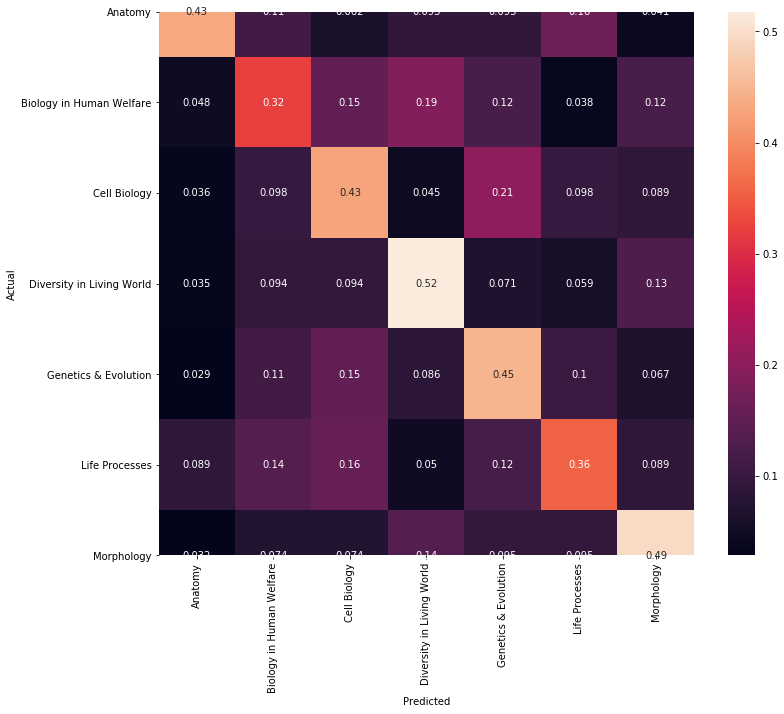

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
index = ['Anatomy',
 'Biology in Human Welfare',
 'Cell Biology',
 'Diversity in Living World',
 'Genetics & Evolution',
 'Life Processes',
 'Morphology']
columns = ['Anatomy',
 'Biology in Human Welfare',
 'Cell Biology',
 'Diversity in Living World',
 'Genetics & Evolution',
 'Life Processes',
 'Morphology']
cm_df = pd.DataFrame(confusion_matrix,columns,index)                      
plt.figure(figsize=(12,10))  
sns.heatmap(cm_df, annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('life_sci_plot_confusion_matrix.png')

In [54]:
target_names = ['Anatomy',
 'Biology in Human Welfare',
 'Cell Biology',
 'Diversity in Living World',
 'Genetics & Evolution',
 'Life Processes',
 'Morphology']
print(classification_report(rounded_labels, y_pred_ohe, target_names=target_names))
plt.savefig()

                           precision    recall  f1-score   support

                  Anatomy       0.61      0.43      0.51        97
 Biology in Human Welfare       0.35      0.32      0.34       105
             Cell Biology       0.41      0.43      0.42       112
Diversity in Living World       0.42      0.52      0.46        85
     Genetics & Evolution       0.39      0.45      0.42       105
           Life Processes       0.39      0.36      0.37       101
               Morphology       0.47      0.49      0.48        95

                 accuracy                           0.43       700
                macro avg       0.43      0.43      0.43       700
             weighted avg       0.43      0.43      0.43       700



TypeError: savefig() missing 1 required positional argument: 'fname'

<Figure size 432x288 with 0 Axes>

In [ ]:
fpr, tpr, _ = metrics.roc_curve(rounded_labels,  y_pred_ohe)
auc = metrics.roc_auc_score(rounded_labels, y_pred_ohe)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [55]:
from sklearn.metrics import roc_auc_score

In [56]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [57]:
multiclass_roc_auc_score(rounded_labels, y_pred_ohe)

0.6664902201382705

In [ ]:
fpr, tpr, _ = metrics.roc_curve(rounded_labels,  y_pred_ohe)
auc = metrics.roc_auc_score(rounded_labels, y_pred_ohe)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
%%bash
tar -czf vishal.tar.gz '/home/ubuntu/vishal/bo_tagging'